# Prediksi Waktu Menuju Gempa dengan Menggunakan Pembelajaran Mesin


## Introduksi Masalah
Prediksi gempa bumi adalah salah satu masalah terpenting dalam ilmu Bumi karena konsekuensinya yang menghancurkan. Kajian ilmiah terkait dengan peramalan gempa bumi berfokus pada tiga poin utama: kapan peristiwa itu akan terjadi, di mana akan terjadi, dan seberapa besar skala gempa tersebut.

Dalam kompetisi ini, kami akan membahas kapan gempa akan terjadi. Secara khusus, kami akan memprediksi waktu yang tersisa sebelum gempa bumi laboratorium terjadi dari data seismik waktu nyata.

Jika tantangan ini dipecahkan dan fisika pada akhirnya ditunjukkan untuk skala dari laboratorium ke lapangan, peneliti akan memiliki potensi untuk meningkatkan penilaian bahaya gempa bumi yang dapat menyelamatkan nyawa dan infrastruktur miliaran dolar.

Data yang digunakan merujuk pada kompetisi Los Alamos National Laboratory (LANL) Earthquake Prediction pada link sebagai berikut https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/data, 

## Analytical Approach
Pada bagian ini, akan dijelaskan apa yang akan saya lakukan untuk menyelesaikan permasalahan yang telah didefinisikan di bagian introduksi masalah. Ada 3 sub bagian yang akan dijelaskan yakni :

* Perumusan solusi
* Menilai kelayakan solusi-solusi
* Menentukan milestones/target-target kecil

### Perumusan Solusi
Kasus yang diintroduksi adalah kasus prediksi regresi pada variabel target waktu menuju gempa dengan menggunakan fitur data akustik dan model machine learning regresi sebagai berikut :

* Decision Tree (DT) Regressor
* Adaptive Boosting (AdaBoost) Regressor
* Histogram Gradient Boosting (HGB) Regressor
* Light Gradient Boosting Machine (LGBM) Regressor
* Extreme Gradient Boosting Machine (XGB) Regressor

Sebelum menggunakan model tersebut, perlu diperhatikan data yang akan digunakan untuk pemodelan ini, ada 4 jenis pendekatan analitik yang akan dilakukan yakni,

* Analisis Deskriptif : Melihat summary statistics dari data tersebut berupa persebaran nilai target dan data akustik.
* Analisis Diagnostik : Melihat korelasi antar fitur target dengan data akustik.
Kedua bagian di atas akan dijelaskan di sub-bagian Exploratory Data Analysis (EDA) pada bagian Data Understanding,
* Analisis Prediktif : Memprediksi waktu menuju gempa dengan menggunakan model machine learning


### Validasi Model
Untuk menilai model regresi yang terbaik dalam memprediksi waktu menuju gempa, maka akan dilihat skor Mean Absolute Error (MAE) yang didefinisikan sebagai berikut,


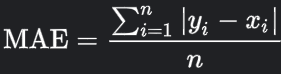

### Milestones
Langkah-langkah yang harus dilakukan untuk membuat model regresi bekerja dengan baik adalah sebagai berikut :

* Exploratory Data Analysis Part 1:
  * Melihat distribusi variabel target dan data akustik
  * Menentukan korelasi dari kedua fitur tersebut
* Feature Engineering:
  * Penambahan fitur terkait dengan metode rolling menggunakan statistika deskriptif
  * Penambahan fitur terkait dengan lag dari data akustik
* Exploratory Data Analysis Part 2:
  * Melihat kembali korelasi antar fitur
  * Melihat distribusi variabel prediktor baru
* Prediksi:
  * Split data menjadi train dan test menggunakan TimeSeriesFold sebanyak 5 fold
  * Prediksi dengan model-model yang telah ditentukan
* Validasi:
  * Mencetak skor MAE untuk setiap model

## Import Data

In [ ]:
# Import data
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c LANL-Earthquake-Prediction

100% 2.26G/2.27G [00:20<00:00, 129MB/s]
100% 2.27G/2.27G [00:20<00:00, 117MB/s]


In [ ]:
!unzip LANL-Earthquake-Prediction.zip
!rm LANL-Earthquake-Prediction.zip

Archive:  LANL-Earthquake-Prediction.zip
  inflating: sample_submission.csv   
  inflating: test/seg_00030f.csv     
  inflating: test/seg_0012b5.csv     
  inflating: test/seg_00184e.csv     
  inflating: test/seg_003339.csv     
  inflating: test/seg_0042cc.csv     
  inflating: test/seg_004314.csv     
  inflating: test/seg_004cd2.csv     
  inflating: test/seg_004ee5.csv     
  inflating: test/seg_004f1f.csv     
  inflating: test/seg_00648a.csv     
  inflating: test/seg_006e4a.csv     
  inflating: test/seg_007a37.csv     
  inflating: test/seg_00a37e.csv     
  inflating: test/seg_00be11.csv     
  inflating: test/seg_00c35b.csv     
  inflating: test/seg_00cc91.csv     
  inflating: test/seg_00e5f7.csv     
  inflating: test/seg_00f3b9.csv     
  inflating: test/seg_010eab.csv     
  inflating: test/seg_0125d9.csv     
  inflating: test/seg_0144cb.csv     
  inflating: test/seg_0165c6.csv     
  inflating: test/seg_016913.csv     
  inflating: test/seg_016cdb.csv     
  inflati

## Libraries yang digunakan


In [ ]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 KB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 40.2 MB/s eta 0:00:00


In [ ]:
!pip install pytorch_forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 KB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 14.4 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=62c38d93ad03dd2a7193e53f46ef90a19a83da8dbd

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd 
import scipy
import time

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet, NBeats
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss


from tqdm import tqdm_notebook

from numpy.fft import rfft, rfftfreq
from scipy import signal
from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
from sklearn.kernel_ridge import KernelRidge

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2023-02-19 02:12:03--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2023-02-19 02:12:03--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.01s   

2023-02-19 02:12:03 (4.39 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



## Read Data

In [ ]:
#df = pd.read_csv('train.csv',  dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
#print(df.shape)

(629145480, 2)


In [ ]:
train = pd.read_csv('train.csv',  dtype={'acoustic_data': np.int16, 'time_to_failure': np.float16})

## Data Understanding
Data terdiri dari dua fitur, semua diambil saat eksperimen gempa bumi pada laboratorium
* acoustic_data: Sinyal seismik yang diperoleh dari seismometer untuk menunjukkan besar vibrasi pada saat terjadi fenomena berbeda seperti angin, erupsi gunung api atau gempa bumi. Sebagai contoh dapat dilihat pada gambar di bawah
* time_to_failure: Waktu menuju gempa bumi yang terjadi di laboratorium

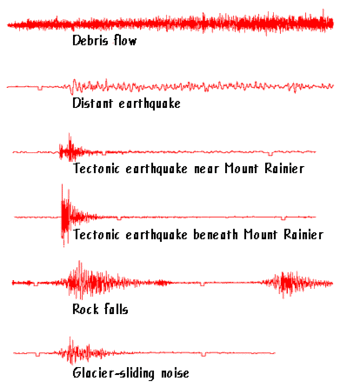

Sumber: https://www.usgs.gov/programs/VHP/seismic-signals-have-unique-signatures-different-types-ground-movement

In [ ]:
# Lihat 5 baris pertama
train.head()

,acoustic_data,time_to_failure
0,12,1.46875
1,6,1.46875
2,8,1.46875
3,5,1.46875
4,8,1.46875


Tidak ada missing values pada kedua fitur tersebut, tapi ada duplikat, tak perlu di drop karena data ini merupakan data sekuensial

### Exploratory Data Analysis

#### Distribusi Data Akustik 

##### Grafik Data Akustik per Indeks

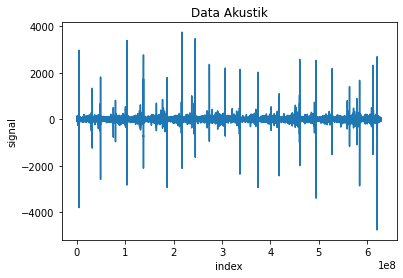

In [ ]:
# Plot Acoustic Data 
train['acoustic_data'][::50].plot()
plt.title('Data Akustik')
plt.xlabel('index')
plt.ylabel('signal')
plt.show()

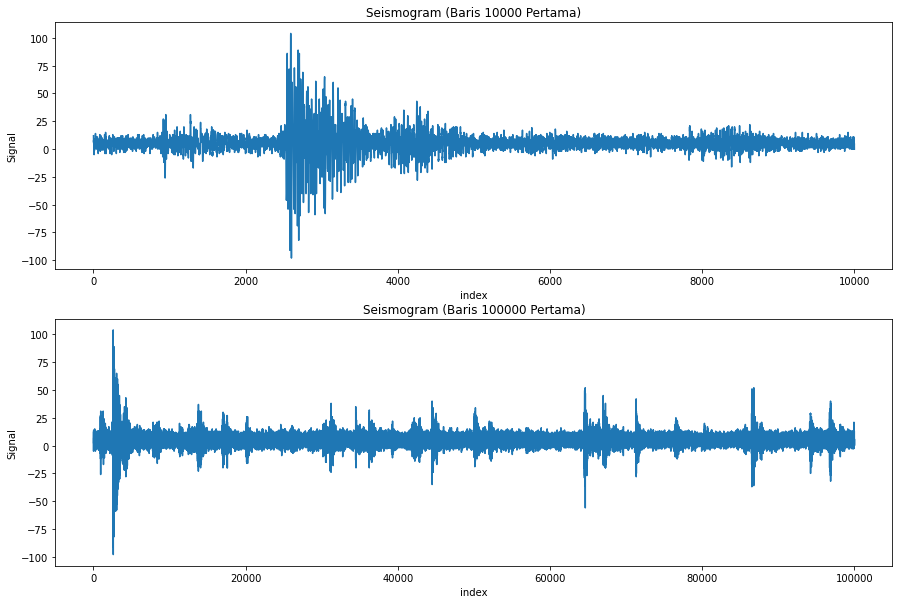

In [ ]:
# Lihat lebih dekat
fig, axes = plt.subplots(2,1, figsize = (15,10))
axes[0].plot(train['acoustic_data'][:10**4])
axes[0].set_title('Seismogram (Baris 10000 Pertama)')
axes[0].set_xlabel('index')
axes[0].set_ylabel('Signal')
axes[1].plot(train['acoustic_data'][:10**5])
axes[1].set_title('Seismogram (Baris 100000 Pertama)')
axes[1].set_xlabel('index')
axes[1].set_ylabel('Signal')
plt.show()

##### KDE Plot Data Akustik

In [ ]:
# Distribusi KDE Plot dari Data Akustik
sns.kdeplot(train['acoustic_data'][::50])
plt.show()

Distribusi sangat tinggi disekitar 0 dan sangat kecil pada signal yang besar karena keberadaan pencilan

In [ ]:
# Apabila tanpa pencilan
sampled_by_50 = train[::50]
low = train['acoustic_data'].mean() - 3 * sampled_by_50['acoustic_data'].std()
high = sampled_by_50['acoustic_data'].mean() + 3 * sampled_by_50['acoustic_data'].std() 
outlier_removed = sampled_by_50[sampled_by_50['acoustic_data'] < high]
outlier_removed = sampled_by_50[sampled_by_50['acoustic_data'] > low]

In [ ]:
# Distribusi KDE Plot dari Data Akustik
sns.kdeplot(outlier_removed['acoustic_data'])
plt.show()

#### Distribusi time_to_failure

##### Grafik Time_to_Failure per Indeks

In [ ]:
# Plot Time_to_failure
plt.plot(train['time_to_failure'][::50])
plt.title('Data Waktu Hingga Gempa')
plt.xlabel('index')
plt.ylabel('Waktu Hingga Gempa (s)')
plt.show()

In [ ]:
# Lihat lebih dekat
fig, axes = plt.subplots(2,1, figsize = (15,10))
axes[0].plot(train['time_to_failure'][:5*10**3])
axes[0].set_title('Data Waktu Hingga Gempa (Baris 5000 Pertama)')
axes[0].set_xlabel('index')
axes[0].set_ylabel('Waktu Hingga Gempa (s)')
axes[1].plot(train['time_to_failure'][:5*10**4])
axes[1].set_title('Data Waktu Hingga Gempa (Baris 50000 Pertama)')
axes[1].set_xlabel('index')
axes[1].set_ylabel('Waktu Hingga Gempa (s)')
plt.show()

Tampak pola seperti fungsi tangga sampai indeks ke 4000 (Tetapi tidak semestinya tetap selang indeksnya), 

In [ ]:
# Cek jump
# Lihat lebih dekat
fig, axes = plt.subplots(2,1, figsize = (20, 18))
axes[0].plot(train.index.values[:4999], np.diff(train['time_to_failure'].values[:5000]))
axes[0].set_title('Data Waktu Hingga Gempa (Baris 5000 Pertama)')
axes[0].set_xlabel('index')
axes[0].set_ylabel('Selisih Waktu Hingga Gempa (s)')
axes[1].plot(train.index.values[:49999], np.diff(train['time_to_failure'].values[:50000]))
axes[1].set_title('Data Waktu Hingga Gempa (Baris 50000 Pertama)')
axes[1].set_xlabel('index')
axes[1].set_ylabel('Selisih Waktu Hingga Gempa (s)')
plt.show()

##### KDE Plot Time_to_Failure

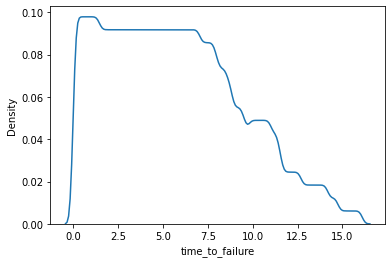

In [ ]:
sns.kdeplot(train['time_to_failure'][::50])
plt.show()

#### Hubungan antara time_to_failure dan acoustic_data

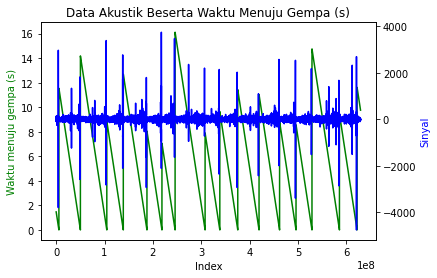

In [ ]:
# Plot double y axis
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(train['time_to_failure'][::50].index, train['time_to_failure'][::50], 'g-')
ax2.plot(train['acoustic_data'][::50].index, train['acoustic_data'][::50], 'b-')

ax1.set_xlabel('Index')
ax1.set_ylabel('Waktu menuju gempa (s)', color='g')
ax2.set_ylabel('Sinyal', color='b')

plt.title('Data Akustik Beserta Waktu Menuju Gempa (s)')
plt.show()

Mari kita lihat untuk 10**7 baris pertama

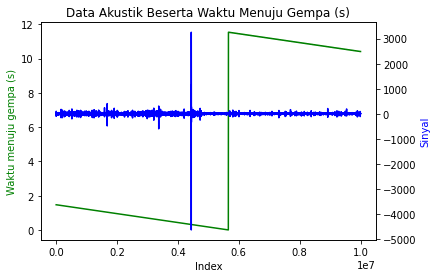

In [ ]:
# Plot double y axis 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(train['time_to_failure'][:10**7].index, train['time_to_failure'][:10**7], 'g-')
ax2.plot(train['acoustic_data'][:10**7].index, train['acoustic_data'][:10**7], 'b-')

ax1.set_xlabel('Index')
ax1.set_ylabel('Waktu menuju gempa (s)', color='g')
ax2.set_ylabel('Sinyal', color='b')

plt.title('Data Akustik Beserta Waktu Menuju Gempa (s)')
plt.show()

Dapat dilihat bahwa terdapat pola sebelum dan sesudah terjadi gempa. Terdapat sinyal seismik yang besar sebelum waktu menuju gempanya bernilai 0.

In [ ]:
# Korelasi antara dua fitur
print("Korelasi antar fitur acoustic_data & time_until_failure:", train['time_to_failure'][::50].corr(train['acoustic_data'][::50]))

Korelasi antar fitur acoustic_data & time_until_failure: -0.00045741939563761623


Tidak ada korelasi linear yang signifikan antara fitur tersebut, dengan demikian model linear seperti regresi linear kurang cocok digunakan pada kasus ini

## Data Preparation

In [ ]:
def add_trend_feature(arr, abs_values=False):
    idx = np.array(range(len(arr)))
    if abs_values:
        arr = np.abs(arr)
    lr = LinearRegression()
    lr.fit(idx.reshape(-1, 1), arr)
    return lr.coef_[0]

def classic_sta_lta(x, length_sta, length_lta):
    
    sta = np.cumsum(x ** 2)

    # Convert to float
    sta = np.require(sta, dtype=np.float)

    # Copy for LTA
    lta = sta.copy()

    # Compute the STA and the LTA
    sta[length_sta:] = sta[length_sta:] - sta[:-length_sta]
    sta /= length_sta
    lta[length_lta:] = lta[length_lta:] - lta[:-length_lta]
    lta /= length_lta

    # Pad zeros
    sta[:length_lta - 1] = 0

    # Avoid division by zero by setting zero values to tiny float
    dtiny = np.finfo(0.0).tiny
    idx = lta < dtiny
    lta[idx] = dtiny

    return sta / lta
  
def calc_change_rate(x):
    change = (np.diff(x) / x[:-1]).values
    change = change[np.nonzero(change)[0]]
    change = change[~np.isnan(change)]
    change = change[change != -np.inf]
    change = change[change != np.inf]
    return np.mean(change)

In [ ]:
# Create a training file with simple derived features
rows = 150_000
segments = int(np.floor(train.shape[0] / rows))

X_tr = pd.DataFrame(index=range(segments), dtype=np.float64)
y_tr = pd.DataFrame(index=range(segments), dtype=np.float64, columns=['time_to_failure'])

for segment in tqdm_notebook(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    x = pd.Series(seg['acoustic_data'].values)
    y = seg['time_to_failure'].values[-1]
    
    y_tr.loc[segment, 'time_to_failure'] = y
    X_tr.loc[segment, 'mean'] = x.mean()
    X_tr.loc[segment, 'std'] = x.std()
    X_tr.loc[segment, 'max'] = x.max()
    X_tr.loc[segment, 'min'] = x.min()

    # Fourier Transform
    zc = np.fft.fft(x)
    real_fft = np.real(zc)
    imag_fft = np.imag(zc)
    magFFT = np.sqrt(real_fft ** 2 + imag_fft ** 2)
    phzFFT = np.arctan(imag_fft / real_fft)
    phzFFT[phzFFT == -np.inf] = -np.pi / 2.0
    phzFFT[phzFFT == np.inf] = np.pi / 2.0
    phzFFT = np.nan_to_num(phzFFT)

    X_tr.loc[segment, 'FFT_Mag_q95'] = np.quantile(magFFT, 0.95)
    X_tr.loc[segment, 'FFT_Mag_q99'] = np.quantile(magFFT, 0.99)
    X_tr.loc[segment, 'FFT_Mag_q05'] = np.quantile(magFFT, 0.05)
    X_tr.loc[segment, 'FFT_Mag_q01'] = np.quantile(magFFT, 0.01)
    X_tr.loc[segment, 'FFT_Mag_avg'] = np.mean(magFFT)
    X_tr.loc[segment, 'FFT_Mag_std'] = np.std(magFFT)  
    X_tr.loc[segment, 'FFT_Mag_max'] = np.max(magFFT) 
    X_tr.loc[segment, 'FFT_Mag_min'] = np.min(magFFT)

    X_tr.loc[segment, 'FFT_Real_q95'] = np.quantile(real_fft, 0.95)
    X_tr.loc[segment, 'FFT_Real_q95'] = np.quantile(real_fft, 0.95)
    X_tr.loc[segment, 'FFT_Real_q99'] = np.quantile(real_fft, 0.99)
    X_tr.loc[segment, 'FFT_Real_q05'] = np.quantile(real_fft, 0.05)
    X_tr.loc[segment, 'FFT_Real_q01'] = np.quantile(real_fft, 0.01)
    X_tr.loc[segment, 'FFT_Real_avg'] = np.mean(real_fft)
    X_tr.loc[segment, 'FFT_Real_std'] = np.std(real_fft)  
    X_tr.loc[segment, 'FFT_Real_max'] = np.max(real_fft) 
    X_tr.loc[segment, 'FFT_Real_min'] = np.min(real_fft)  

    X_tr.loc[segment, 'FFT_Imag_q95'] = np.quantile(imag_fft, 0.95)
    X_tr.loc[segment, 'FFT_Imag_q99'] = np.quantile(imag_fft, 0.99)
    X_tr.loc[segment, 'FFT_Imag_q05'] = np.quantile(imag_fft, 0.05)
    X_tr.loc[segment, 'FFT_Imag_q01'] = np.quantile(imag_fft, 0.01)
    X_tr.loc[segment, 'FFT_Imag_avg'] = np.mean(imag_fft)
    X_tr.loc[segment, 'FFT_Imag_std'] = np.std(imag_fft)  
    X_tr.loc[segment, 'FFT_Imag_max'] = np.max(imag_fft) 
    X_tr.loc[segment, 'FFT_Imag_min'] = np.min(imag_fft)

    X_tr.loc[segment, 'FFT_Phz_mean'] = np.mean(phzFFT)
    X_tr.loc[segment, 'FFT_Phz_std'] = np.std(phzFFT)

    X_tr.loc[segment, 'mean_change_abs'] = np.mean(np.diff(x))
    X_tr.loc[segment, 'mean_change_rate'] = calc_change_rate(x)
    X_tr.loc[segment, 'abs_max'] = np.abs(x).max()
    X_tr.loc[segment, 'abs_min'] = np.abs(x).min()
    
    X_tr.loc[segment, 'std_first_50000'] = x[:50000].std()
    X_tr.loc[segment, 'std_last_50000'] = x[-50000:].std()
    X_tr.loc[segment, 'std_first_10000'] = x[:10000].std()
    X_tr.loc[segment, 'std_last_10000'] = x[-10000:].std()
    
    X_tr.loc[segment, 'avg_first_50000'] = x[:50000].mean()
    X_tr.loc[segment, 'avg_last_50000'] = x[-50000:].mean()
    X_tr.loc[segment, 'avg_first_10000'] = x[:10000].mean()
    X_tr.loc[segment, 'avg_last_10000'] = x[-10000:].mean()
    
    X_tr.loc[segment, 'min_first_50000'] = x[:50000].min()
    X_tr.loc[segment, 'min_last_50000'] = x[-50000:].min()
    X_tr.loc[segment, 'min_first_10000'] = x[:10000].min()
    X_tr.loc[segment, 'min_last_10000'] = x[-10000:].min()
    
    X_tr.loc[segment, 'max_first_50000'] = x[:50000].max()
    X_tr.loc[segment, 'max_last_50000'] = x[-50000:].max()
    X_tr.loc[segment, 'max_first_10000'] = x[:10000].max()
    X_tr.loc[segment, 'max_last_10000'] = x[-10000:].max()
    
    X_tr.loc[segment, 'max_to_min'] = x.max() / np.abs(x.min())
    X_tr.loc[segment, 'max_to_min_diff'] = x.max() - np.abs(x.min())
    X_tr.loc[segment, 'count_big'] = len(x[np.abs(x) > 500])
    X_tr.loc[segment, 'sum'] = x.sum()
    
    X_tr.loc[segment, 'mean_change_rate_first_50000'] = calc_change_rate(x[:50000])
    X_tr.loc[segment, 'mean_change_rate_last_50000'] = calc_change_rate(x[-50000:])
    X_tr.loc[segment, 'mean_change_rate_first_10000'] = calc_change_rate(x[:10000])
    X_tr.loc[segment, 'mean_change_rate_last_10000'] = calc_change_rate(x[-10000:])
    
    X_tr.loc[segment, 'q95'] = np.quantile(x, 0.95)
    X_tr.loc[segment, 'q99'] = np.quantile(x, 0.99)
    X_tr.loc[segment, 'q05'] = np.quantile(x, 0.05)
    X_tr.loc[segment, 'q01'] = np.quantile(x, 0.01)
    
    X_tr.loc[segment, 'abs_q95'] = np.quantile(np.abs(x), 0.95)
    X_tr.loc[segment, 'abs_q99'] = np.quantile(np.abs(x), 0.99)
    X_tr.loc[segment, 'abs_q05'] = np.quantile(np.abs(x), 0.05)
    X_tr.loc[segment, 'abs_q01'] = np.quantile(np.abs(x), 0.01)
    
    X_tr.loc[segment, 'trend'] = add_trend_feature(x)
    X_tr.loc[segment, 'abs_trend'] = add_trend_feature(x, abs_values=True)
    X_tr.loc[segment, 'abs_mean'] = np.abs(x).mean()
    X_tr.loc[segment, 'abs_std'] = np.abs(x).std()
    
    X_tr.loc[segment, 'mad'] = x.mad()
    X_tr.loc[segment, 'kurt'] = x.kurtosis()
    X_tr.loc[segment, 'skew'] = x.skew()
    X_tr.loc[segment, 'med'] = x.median()
    
    X_tr.loc[segment, 'Hilbert_mean'] = np.abs(hilbert(x)).mean()
    X_tr.loc[segment, 'Hann_window_mean'] = (convolve(x, hann(150), mode='same') / sum(hann(150))).mean()
    X_tr.loc[segment, 'classic_sta_lta1_mean'] = classic_sta_lta(x, 500, 10000).mean()
    X_tr.loc[segment, 'classic_sta_lta2_mean'] = classic_sta_lta(x, 5000, 100000).mean()
    X_tr.loc[segment, 'classic_sta_lta3_mean'] = classic_sta_lta(x, 3333, 6666).mean()
    X_tr.loc[segment, 'classic_sta_lta4_mean'] = classic_sta_lta(x, 10000, 25000).mean()
    X_tr.loc[segment, 'classic_sta_lta5_mean'] = classic_sta_lta(x, 50, 1000).mean()
    X_tr.loc[segment, 'classic_sta_lta6_mean'] = classic_sta_lta(x, 100, 5000).mean()
    X_tr.loc[segment, 'classic_sta_lta7_mean'] = classic_sta_lta(x, 333, 666).mean()
    X_tr.loc[segment, 'classic_sta_lta8_mean'] = classic_sta_lta(x, 4000, 10000).mean()
    X_tr.loc[segment, 'Moving_average_700_mean'] = x.rolling(window=700).mean().mean(skipna=True)
    ewma = pd.Series.ewm
    X_tr.loc[segment, 'exp_Moving_average_300_mean'] = (ewma(x, span=300).mean()).mean(skipna=True)
    X_tr.loc[segment, 'exp_Moving_average_3000_mean'] = ewma(x, span=3000).mean().mean(skipna=True)
    X_tr.loc[segment, 'exp_Moving_average_30000_mean'] = ewma(x, span=30000).mean().mean(skipna=True)
    no_of_std = 3
    X_tr.loc[segment, 'MA_700MA_std_mean'] = x.rolling(window=700).std().mean()
    X_tr.loc[segment,'MA_700MA_BB_high_mean'] = (X_tr.loc[segment, 'Moving_average_700_mean'] + no_of_std * X_tr.loc[segment, 'MA_700MA_std_mean']).mean()
    X_tr.loc[segment,'MA_700MA_BB_low_mean'] = (X_tr.loc[segment, 'Moving_average_700_mean'] - no_of_std * X_tr.loc[segment, 'MA_700MA_std_mean']).mean()
    X_tr.loc[segment, 'MA_400MA_std_mean'] = x.rolling(window=400).std().mean()
    X_tr.loc[segment,'MA_400MA_BB_high_mean'] = (X_tr.loc[segment, 'Moving_average_700_mean'] + no_of_std * X_tr.loc[segment, 'MA_400MA_std_mean']).mean()
    X_tr.loc[segment,'MA_400MA_BB_low_mean'] = (X_tr.loc[segment, 'Moving_average_700_mean'] - no_of_std * X_tr.loc[segment, 'MA_400MA_std_mean']).mean()
    X_tr.loc[segment, 'MA_1000MA_std_mean'] = x.rolling(window=1000).std().mean()
    X_tr.drop('Moving_average_700_mean', axis=1, inplace=True)
    
    X_tr.loc[segment, 'iqr'] = np.subtract(*np.percentile(x, [75, 25]))
    X_tr.loc[segment, 'q999'] = np.quantile(x,0.999)
    X_tr.loc[segment, 'q001'] = np.quantile(x,0.001)
    X_tr.loc[segment, 'ave10'] = stats.trim_mean(x, 0.1)

    for windows in [10, 100, 1000]:
        x_roll_std = x.rolling(windows).std().dropna().values
        x_roll_mean = x.rolling(windows).mean().dropna().values
        
        X_tr.loc[segment, 'ave_roll_std_' + str(windows)] = x_roll_std.mean()
        X_tr.loc[segment, 'std_roll_std_' + str(windows)] = x_roll_std.std()
        X_tr.loc[segment, 'max_roll_std_' + str(windows)] = x_roll_std.max()
        X_tr.loc[segment, 'min_roll_std_' + str(windows)] = x_roll_std.min()
        X_tr.loc[segment, 'q01_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.01)
        X_tr.loc[segment, 'q05_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.05)
        X_tr.loc[segment, 'q95_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.95)
        X_tr.loc[segment, 'q99_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.99)
        X_tr.loc[segment, 'av_change_abs_roll_std_' + str(windows)] = np.mean(np.diff(x_roll_std))
        X_tr.loc[segment, 'av_change_rate_roll_std_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_std) / x_roll_std[:-1]))[0])
        X_tr.loc[segment, 'abs_max_roll_std_' + str(windows)] = np.abs(x_roll_std).max()
        
        X_tr.loc[segment, 'ave_roll_mean_' + str(windows)] = x_roll_mean.mean()
        X_tr.loc[segment, 'std_roll_mean_' + str(windows)] = x_roll_mean.std()
        X_tr.loc[segment, 'max_roll_mean_' + str(windows)] = x_roll_mean.max()
        X_tr.loc[segment, 'min_roll_mean_' + str(windows)] = x_roll_mean.min()
        X_tr.loc[segment, 'q01_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.01)
        X_tr.loc[segment, 'q05_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.05)
        X_tr.loc[segment, 'q95_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.95)
        X_tr.loc[segment, 'q99_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.99)
        X_tr.loc[segment, 'av_change_abs_roll_mean_' + str(windows)] = np.mean(np.diff(x_roll_mean))
        X_tr.loc[segment, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
        X_tr.loc[segment, 'abs_max_roll_mean_' + str(windows)] = np.abs(x_roll_mean).max()


<ipython-input-30-9795fa98f6b1>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for segment in tqdm_notebook(range(segments)):


  0%|          | 0/4194 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
<ipython-input-30-9795fa98f6b1>:171: RuntimeWarning: invalid value encountered in true_divide
  X_tr.loc[segment, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
<ipython-input-29-5c2703d5d7d4>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sta = np.require(sta, dtype=np.float)
<ipython-input-30-9795fa98f6b1>:171: RuntimeWarning: divide by zero encountered in true_divide
  X_tr.loc[segment, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
<ipython-input-30-9795fa98f6b1>:171: RuntimeWa

In [ ]:
means_dict = {}
for col in X_tr.columns:
    if X_tr[col].isnull().any():
        print(col)
        mean_value = X_tr.loc[X_tr[col] != -np.inf, col].mean()
        X_tr.loc[X_tr[col] == -np.inf, col] = mean_value
        X_tr[col] = X_tr[col].fillna(mean_value)
        means_dict[col] = mean_value

classic_sta_lta5_mean
classic_sta_lta7_mean


In [ ]:
scaler = StandardScaler()
scaler.fit(X_tr)
X_train_scaled = pd.DataFrame(scaler.transform(X_tr), columns=X_tr.columns)

In [ ]:
X_train_scaled.to_excel('X_tr.xlsx', index = False)

In [ ]:
y_tr.to_excel('y_tr.xlsx', index = False)

<ipython-input-43-3748df802dbe>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, seg_id in enumerate(tqdm_notebook(X_test.index)):


  0%|          | 0/2624 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
  X_test.loc[seg_id, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
<ipython-input-43-3748df802dbe>:165: RuntimeWarning: invalid value encountered in true_divide
  X_test.loc[seg_id, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
<ipython-input-29-5c2703d5d7d4>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sta = np.require(sta, dtype=np.float)
<ipython-input-43-3748df802dbe>:165: RuntimeWarning: divide by zero encountered in true_divide
  X_test.loc[seg_id, 'av_change_rate_roll_me

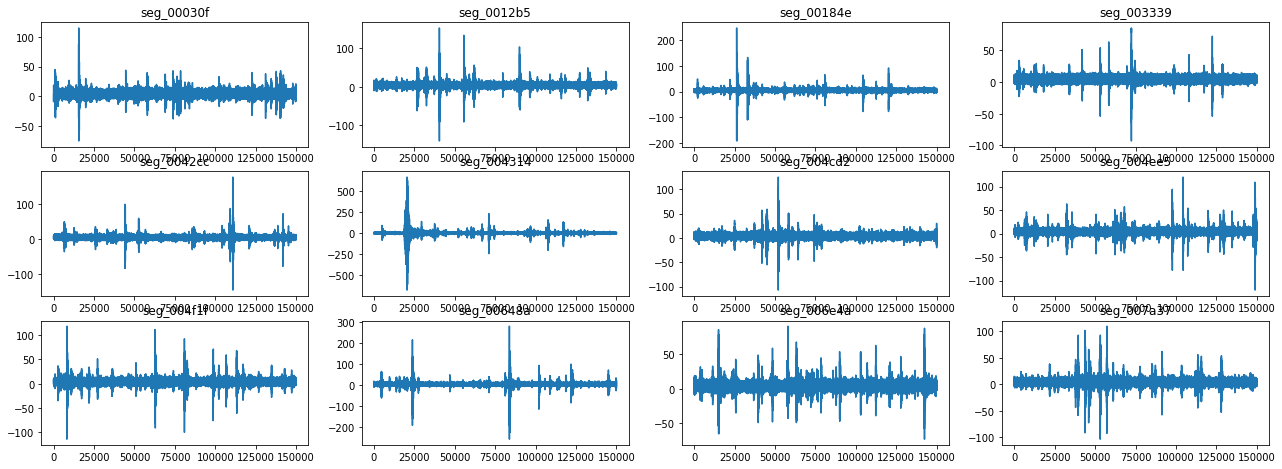

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv', index_col='seg_id')
X_test = pd.DataFrame(columns=X_tr.columns, dtype=np.float64, index=submission.index)
plt.figure(figsize=(22, 16))

for i, seg_id in enumerate(tqdm_notebook(X_test.index)):
    seg = pd.read_csv('/content/test/' + seg_id + '.csv')
    
    x = pd.Series(seg['acoustic_data'].values)
    X_test.loc[seg_id, 'mean'] = x.mean()
    X_test.loc[seg_id, 'std'] = x.std()
    X_test.loc[seg_id, 'max'] = x.max()
    X_test.loc[seg_id, 'min'] = x.min()
        
    X_test.loc[seg_id, 'mean_change_abs'] = np.mean(np.diff(x))
    X_test.loc[seg_id, 'mean_change_rate'] = calc_change_rate(x)
    X_test.loc[seg_id, 'abs_max'] = np.abs(x).max()
    X_test.loc[seg_id, 'abs_min'] = np.abs(x).min()
    
    X_test.loc[seg_id, 'std_first_50000'] = x[:50000].std()
    X_test.loc[seg_id, 'std_last_50000'] = x[-50000:].std()
    X_test.loc[seg_id, 'std_first_10000'] = x[:10000].std()
    X_test.loc[seg_id, 'std_last_10000'] = x[-10000:].std()
    
    X_test.loc[seg_id, 'avg_first_50000'] = x[:50000].mean()
    X_test.loc[seg_id, 'avg_last_50000'] = x[-50000:].mean()
    X_test.loc[seg_id, 'avg_first_10000'] = x[:10000].mean()
    X_test.loc[seg_id, 'avg_last_10000'] = x[-10000:].mean()
    
    X_test.loc[seg_id, 'min_first_50000'] = x[:50000].min()
    X_test.loc[seg_id, 'min_last_50000'] = x[-50000:].min()
    X_test.loc[seg_id, 'min_first_10000'] = x[:10000].min()
    X_test.loc[seg_id, 'min_last_10000'] = x[-10000:].min()
    
    X_test.loc[seg_id, 'max_first_50000'] = x[:50000].max()
    X_test.loc[seg_id, 'max_last_50000'] = x[-50000:].max()
    X_test.loc[seg_id, 'max_first_10000'] = x[:10000].max()
    X_test.loc[seg_id, 'max_last_10000'] = x[-10000:].max()

    # Fourier Transform
    zc = np.fft.fft(x)
    real_fft = np.real(zc)
    imag_fft = np.imag(zc)
    magFFT = np.sqrt(real_fft ** 2 + imag_fft ** 2)
    phzFFT = np.arctan(imag_fft / real_fft)
    phzFFT[phzFFT == -np.inf] = -np.pi / 2.0
    phzFFT[phzFFT == np.inf] = np.pi / 2.0
    phzFFT = np.nan_to_num(phzFFT)

    X_test.loc[seg_id, 'FFT_Real_q95'] = np.quantile(real_fft, 0.95)
    X_test.loc[seg_id, 'FFT_Real_q95'] = np.quantile(real_fft, 0.95)
    X_test.loc[seg_id, 'FFT_Real_q99'] = np.quantile(real_fft, 0.99)
    X_test.loc[seg_id, 'FFT_Real_q05'] = np.quantile(real_fft, 0.05)
    X_test.loc[seg_id, 'FFT_Real_q01'] = np.quantile(real_fft, 0.01)
    X_test.loc[seg_id, 'FFT_Real_avg'] = np.mean(real_fft)
    X_test.loc[seg_id, 'FFT_Real_std'] = np.std(real_fft)  
    X_test.loc[seg_id, 'FFT_Real_max'] = np.max(real_fft) 
    X_test.loc[seg_id, 'FFT_Real_min'] = np.min(real_fft)  

    X_test.loc[seg_id, 'FFT_Imag_q95'] = np.quantile(imag_fft, 0.95)
    X_test.loc[seg_id, 'FFT_Imag_q99'] = np.quantile(imag_fft, 0.99)
    X_test.loc[seg_id, 'FFT_Imag_q05'] = np.quantile(imag_fft, 0.05)
    X_test.loc[seg_id, 'FFT_Imag_q01'] = np.quantile(imag_fft, 0.01)
    X_test.loc[seg_id, 'FFT_Imag_avg'] = np.mean(imag_fft)
    X_test.loc[seg_id, 'FFT_Imag_std'] = np.std(imag_fft)  
    X_test.loc[seg_id, 'FFT_Imag_max'] = np.max(imag_fft) 
    X_test.loc[seg_id, 'FFT_Imag_min'] = np.min(imag_fft)

    X_test.loc[seg_id, 'FFT_Mag_q95'] = np.quantile(magFFT, 0.95)
    X_test.loc[seg_id, 'FFT_Mag_q99'] = np.quantile(magFFT, 0.99)
    X_test.loc[seg_id, 'FFT_Mag_q05'] = np.quantile(magFFT, 0.05)
    X_test.loc[seg_id, 'FFT_Mag_q01'] = np.quantile(magFFT, 0.01)
    X_test.loc[seg_id, 'FFT_Mag_avg'] = np.mean(magFFT)
    X_test.loc[seg_id, 'FFT_Mag_std'] = np.std(magFFT)  
    X_test.loc[seg_id, 'FFT_Mag_max'] = np.max(magFFT) 
    X_test.loc[seg_id, 'FFT_Mag_min'] = np.min(magFFT)

    X_test.loc[seg_id, 'FFT_Phz_mean'] = np.mean(phzFFT)
    X_test.loc[seg_id, 'FFT_Phz_std'] = np.std(phzFFT)
    
    X_test.loc[seg_id, 'max_to_min'] = x.max() / np.abs(x.min())
    X_test.loc[seg_id, 'max_to_min_diff'] = x.max() - np.abs(x.min())
    X_test.loc[seg_id, 'count_big'] = len(x[np.abs(x) > 500])
    X_test.loc[seg_id, 'sum'] = x.sum()
    
    X_test.loc[seg_id, 'mean_change_rate_first_50000'] = calc_change_rate(x[:50000])
    X_test.loc[seg_id, 'mean_change_rate_last_50000'] = calc_change_rate(x[-50000:])
    X_test.loc[seg_id, 'mean_change_rate_first_10000'] = calc_change_rate(x[:10000])
    X_test.loc[seg_id, 'mean_change_rate_last_10000'] = calc_change_rate(x[-10000:])
    
    X_test.loc[seg_id, 'q95'] = np.quantile(x,0.95)
    X_test.loc[seg_id, 'q99'] = np.quantile(x,0.99)
    X_test.loc[seg_id, 'q05'] = np.quantile(x,0.05)
    X_test.loc[seg_id, 'q01'] = np.quantile(x,0.01)
    
    X_test.loc[seg_id, 'abs_q95'] = np.quantile(np.abs(x), 0.95)
    X_test.loc[seg_id, 'abs_q99'] = np.quantile(np.abs(x), 0.99)
    X_test.loc[seg_id, 'abs_q05'] = np.quantile(np.abs(x), 0.05)
    X_test.loc[seg_id, 'abs_q01'] = np.quantile(np.abs(x), 0.01)
    
    X_test.loc[seg_id, 'trend'] = add_trend_feature(x)
    X_test.loc[seg_id, 'abs_trend'] = add_trend_feature(x, abs_values=True)
    X_test.loc[seg_id, 'abs_mean'] = np.abs(x).mean()
    X_test.loc[seg_id, 'abs_std'] = np.abs(x).std()
    
    X_test.loc[seg_id, 'mad'] = x.mad()
    X_test.loc[seg_id, 'kurt'] = x.kurtosis()
    X_test.loc[seg_id, 'skew'] = x.skew()
    X_test.loc[seg_id, 'med'] = x.median()
    
    X_test.loc[seg_id, 'Hilbert_mean'] = np.abs(hilbert(x)).mean()
    X_test.loc[seg_id, 'Hann_window_mean'] = (convolve(x, hann(150), mode='same') / sum(hann(150))).mean()
    X_test.loc[seg_id, 'classic_sta_lta1_mean'] = classic_sta_lta(x, 500, 10000).mean()
    X_test.loc[seg_id, 'classic_sta_lta2_mean'] = classic_sta_lta(x, 5000, 100000).mean()
    X_test.loc[seg_id, 'classic_sta_lta3_mean'] = classic_sta_lta(x, 3333, 6666).mean()
    X_test.loc[seg_id, 'classic_sta_lta4_mean'] = classic_sta_lta(x, 10000, 25000).mean()
    X_test.loc[seg_id, 'classic_sta_lta5_mean'] = classic_sta_lta(x, 50, 1000).mean()
    X_test.loc[seg_id, 'classic_sta_lta6_mean'] = classic_sta_lta(x, 100, 5000).mean()
    X_test.loc[seg_id, 'classic_sta_lta7_mean'] = classic_sta_lta(x, 333, 666).mean()
    X_test.loc[seg_id, 'classic_sta_lta8_mean'] = classic_sta_lta(x, 4000, 10000).mean()
    X_test.loc[seg_id, 'Moving_average_700_mean'] = x.rolling(window=700).mean().mean(skipna=True)
    ewma = pd.Series.ewm
    X_test.loc[seg_id, 'exp_Moving_average_300_mean'] = (ewma(x, span=300).mean()).mean(skipna=True)
    X_test.loc[seg_id, 'exp_Moving_average_3000_mean'] = ewma(x, span=3000).mean().mean(skipna=True)
    X_test.loc[seg_id, 'exp_Moving_average_30000_mean'] = ewma(x, span=30000).mean().mean(skipna=True)
    no_of_std = 3
    X_test.loc[seg_id, 'MA_700MA_std_mean'] = x.rolling(window=700).std().mean()
    X_test.loc[seg_id,'MA_700MA_BB_high_mean'] = (X_test.loc[seg_id, 'Moving_average_700_mean'] + no_of_std * X_test.loc[seg_id, 'MA_700MA_std_mean']).mean()
    X_test.loc[seg_id,'MA_700MA_BB_low_mean'] = (X_test.loc[seg_id, 'Moving_average_700_mean'] - no_of_std * X_test.loc[seg_id, 'MA_700MA_std_mean']).mean()
    X_test.loc[seg_id, 'MA_400MA_std_mean'] = x.rolling(window=400).std().mean()
    X_test.loc[seg_id,'MA_400MA_BB_high_mean'] = (X_test.loc[seg_id, 'Moving_average_700_mean'] + no_of_std * X_test.loc[seg_id, 'MA_400MA_std_mean']).mean()
    X_test.loc[seg_id,'MA_400MA_BB_low_mean'] = (X_test.loc[seg_id, 'Moving_average_700_mean'] - no_of_std * X_test.loc[seg_id, 'MA_400MA_std_mean']).mean()
    X_test.loc[seg_id, 'MA_1000MA_std_mean'] = x.rolling(window=1000).std().mean()
    X_test.drop('Moving_average_700_mean', axis=1, inplace=True)
    
    X_test.loc[seg_id, 'iqr'] = np.subtract(*np.percentile(x, [75, 25]))
    X_test.loc[seg_id, 'q999'] = np.quantile(x,0.999)
    X_test.loc[seg_id, 'q001'] = np.quantile(x,0.001)
    X_test.loc[seg_id, 'ave10'] = stats.trim_mean(x, 0.1)
    
    for windows in [10, 100, 1000]:
        x_roll_std = x.rolling(windows).std().dropna().values
        x_roll_mean = x.rolling(windows).mean().dropna().values
        
        X_test.loc[seg_id, 'ave_roll_std_' + str(windows)] = x_roll_std.mean()
        X_test.loc[seg_id, 'std_roll_std_' + str(windows)] = x_roll_std.std()
        X_test.loc[seg_id, 'max_roll_std_' + str(windows)] = x_roll_std.max()
        X_test.loc[seg_id, 'min_roll_std_' + str(windows)] = x_roll_std.min()
        X_test.loc[seg_id, 'q01_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.01)
        X_test.loc[seg_id, 'q05_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.05)
        X_test.loc[seg_id, 'q95_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.95)
        X_test.loc[seg_id, 'q99_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.99)
        X_test.loc[seg_id, 'av_change_abs_roll_std_' + str(windows)] = np.mean(np.diff(x_roll_std))
        X_test.loc[seg_id, 'av_change_rate_roll_std_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_std) / x_roll_std[:-1]))[0])
        X_test.loc[seg_id, 'abs_max_roll_std_' + str(windows)] = np.abs(x_roll_std).max()
        
        X_test.loc[seg_id, 'ave_roll_mean_' + str(windows)] = x_roll_mean.mean()
        X_test.loc[seg_id, 'std_roll_mean_' + str(windows)] = x_roll_mean.std()
        X_test.loc[seg_id, 'max_roll_mean_' + str(windows)] = x_roll_mean.max()
        X_test.loc[seg_id, 'min_roll_mean_' + str(windows)] = x_roll_mean.min()
        X_test.loc[seg_id, 'q01_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.01)
        X_test.loc[seg_id, 'q05_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.05)
        X_test.loc[seg_id, 'q95_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.95)
        X_test.loc[seg_id, 'q99_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.99)
        X_test.loc[seg_id, 'av_change_abs_roll_mean_' + str(windows)] = np.mean(np.diff(x_roll_mean))
        X_test.loc[seg_id, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
        X_test.loc[seg_id, 'abs_max_roll_mean_' + str(windows)] = np.abs(x_roll_mean).max()
    
    if i < 12:
        plt.subplot(6, 4, i + 1)
        plt.plot(seg['acoustic_data'])
        plt.title(seg_id)

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_test

,mean,std,max,min,FFT_Mag_q95,FFT_Mag_q99,FFT_Mag_q05,FFT_Mag_q01,FFT_Mag_avg,FFT_Mag_std,...,std_roll_mean_1000,max_roll_mean_1000,min_roll_mean_1000,q01_roll_mean_1000,q05_roll_mean_1000,q95_roll_mean_1000,q99_roll_mean_1000,av_change_abs_roll_mean_1000,av_change_rate_roll_mean_1000,abs_max_roll_mean_1000
seg_id,,,,,,,,,,,,,,,,,,,,,
seg_00030f,4.491780,4.893690,115.0,-75.0,4042.732586,7622.936620,204.198075,88.100003,1254.037936,2246.332089,...,0.231891,5.495,3.774,3.889,4.099,4.867,5.000,1.778523e-06,74583.596159,5.495
seg_0012b5,4.171153,5.922839,152.0,-140.0,4974.778219,9780.827571,208.463486,91.725428,1392.755787,2435.565298,...,0.230914,5.009,3.342,3.644,3.790,4.541,4.739,-1.946309e-07,74346.833285,5.009
seg_00184e,4.610260,6.946990,248.0,-193.0,5937.124458,11964.151405,211.572293,92.453687,1516.299674,2850.975675,...,0.247219,6.234,3.544,4.013,4.215,4.966,5.082,8.053691e-08,74349.464459,6.234
seg_003339,4.531473,4.114147,85.0,-93.0,3070.725656,6268.382326,205.968689,88.998483,1127.373974,2085.204767,...,0.224909,5.446,3.889,4.032,4.184,4.911,5.051,3.899329e-06,74430.046483,5.446
seg_0042cc,4.128340,5.797164,177.0,-147.0,4437.141476,9822.156258,208.134627,90.817440,1340.070052,2408.676661,...,0.274025,5.027,3.357,3.534,3.662,4.570,4.870,-2.939597e-06,74545.727161,5.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seg_ff4236,4.095773,5.082443,71.0,-50.0,4001.676016,8130.319836,205.054761,90.489535,1260.114181,2191.591716,...,0.248158,4.887,3.439,3.615,3.699,4.517,4.732,1.677852e-06,74414.941002,4.887
seg_ff7478,4.138493,6.031596,164.0,-208.0,5242.918732,10123.164525,211.073491,93.311611,1411.573140,2456.321899,...,0.300919,5.239,3.122,3.283,3.549,4.529,4.698,4.107383e-06,74374.840567,5.239
seg_ff79d9,3.748587,9.467532,310.0,-303.0,7663.337229,17076.541811,210.758657,93.811777,1794.036923,3512.015307,...,0.227666,5.234,2.674,3.182,3.384,4.107,4.238,4.228188e-06,74354.722711,5.234


In [ ]:
X_test_scaled.to_excel('X_ts.xlsx', index = False)

## Modelling (Tree Based)

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [ ]:
# Import Data
X_train_scaled = pd.read_excel('X_tr.xlsx')
X_test_scaled = pd.read_excel('X_ts.xlsx')
y_tr = pd.read_excel('y_tr.xlsx')

In [ ]:
print('X_train shape:', X_train_scaled.shape)
print('y_train shape:', y_tr.shape)
print('X_test shape:', X_test_scaled.shape)

X_train shape: (4194, 164)
y_train shape: (4194, 1)
X_test shape: (2624, 164)


In [ ]:
corr = X_train_scaled.corr()  
mask = np.triu(np.ones_like(corr))
plt.figure(figsize = (15,10))
sns.heatmap(corr, mask = mask)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

### Decision Tree

In [ ]:
dectree =  DecisionTreeRegressor(criterion = 'absolute_error')
tscv = TimeSeriesSplit()
grid_dectree = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

dectree_cv = RandomizedSearchCV(dectree, grid_dectree, scoring = 'neg_mean_absolute_error', cv = tscv)

In [ ]:
for n in range(15):
  print(f"Iter-{n+1}:")
  dectree_cv.fit(X_train_scaled, y_tr)
  print(f'Best Params: {dectree_cv.best_params_}')
  print(f'Best Score: {dectree_cv.best_score_}')
  print('-------------------------------------------')

Iter-1:
Best Params: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 10, 'max_leaf_nodes': 50, 'max_features': 'auto', 'max_depth': 11}
Best Score: -2.2940329086456517
-------------------------------------------
Iter-2:
Best Params: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 6, 'max_leaf_nodes': 20, 'max_features': None, 'max_depth': 7}
Best Score: -2.2940329086456517
-------------------------------------------
Iter-3:
Best Params: {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 9, 'max_leaf_nodes': 30, 'max_features': 'auto', 'max_depth': 7}
Best Score: -2.2940329086456517
-------------------------------------------
Iter-4:
Best Params: {'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 50, 'max_features': None, 'max_depth': 3}
Best Score: -2.2735977445719753
-------------------------------------------
Iter-5:
Best Params: {'splitter': 'best', 'min_weight_fr

In [ ]:
best_params = {'criterion':'absolute_error', 'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 
               'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 5,
               'random_state':111}
dectree_best = DecisionTreeRegressor(**best_params)

In [ ]:
# Feature Selection
tscv = TimeSeriesSplit()
sfs_dectree = SFS(dectree_best,
                  k_features = 50,
                  forward=True, 
                  floating=False, 
                  verbose=2,
                  scoring='neg_mean_absolute_error',
                  cv = tscv)
sfs_dectree.fit(X_train_scaled, y_tr, custom_feature_names=X_train_scaled.columns)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 164 out of 164 | elapsed:    6.4s finished

[2023-02-18 10:25:12] Features: 1/50 -- score: -2.6199024544253366[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:    7.5s finished

[2023-02-18 10:25:19] Features: 2/50 -- score: -2.3585251520290567[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    9.0s finished

[2023-02-18 10:25:28] Features: 3/50 -- score: -2.2373365399493[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                          max_depth=5,
                                                          max_features='auto',
                                                          max_leaf_nodes=10,
                                                          min_samples_leaf=10,
                                                          min_weight_fraction_leaf=0.1,
                                                          splitter='random'),
                          k_features=50, scoring='neg_mean_absolute_error',
                          verbose=2)

In [ ]:
sfs_dectree.k_feature_names_

NameError: ignored

16 fitur dapat menghasilkan skor yang lebih bagus.
'std',
 'max',
 'mean_change_rate',
 'abs_max',
 'avg_last_50000',
 'max_last_50000',
 'max_to_min',
 'mean_change_rate_last_50000',
 'mean_change_rate_last_10000',
 'q95',
 'q05',
 'abs_q05',
 'trend',
 'abs_trend',
 'abs_mean',
 'skew'

In [ ]:
X_train_scaled_dectree = X_train_scaled[['mean',
 'FFT_Mag_q95',
 'FFT_Mag_q99',
 'FFT_Imag_q05',
 'mean_change_rate',
 'avg_first_50000',
 'avg_last_50000',
 'min_last_50000',
 'min_first_10000',
 'max_first_50000',
 'max_to_min',
 'sum',
 'mean_change_rate_first_50000',
 'mean_change_rate_last_50000',
 'q95',
 'q01',
 'abs_q95',
 'abs_q99',
 'abs_mean',
 'Hilbert_mean',
 'Hann_window_mean',
 'classic_sta_lta2_mean',
 'classic_sta_lta5_mean',
 'classic_sta_lta6_mean',
 'classic_sta_lta8_mean',
 'MA_400MA_std_mean',
 'MA_400MA_BB_high_mean',
 'MA_1000MA_std_mean',
 'ave_roll_std_10',
 'min_roll_std_10',
 'q01_roll_std_10',
 'q05_roll_std_10',
 'q95_roll_std_10',
 'q99_roll_std_10',
 'q01_roll_mean_10',
 'q95_roll_mean_10',
 'av_change_abs_roll_mean_10',
 'abs_max_roll_mean_10',
 'ave_roll_std_100',
 'q01_roll_std_100',
 'q05_roll_std_100',
 'q95_roll_std_100',
 'std_roll_mean_100',
 'max_roll_mean_100',
 'q01_roll_mean_100',
 'av_change_rate_roll_mean_100']]

X_test_scaled_dectree = X_test_scaled[['mean',
 'FFT_Mag_q95',
 'FFT_Mag_q99',
 'FFT_Imag_q05',
 'mean_change_rate',
 'avg_first_50000',
 'avg_last_50000',
 'min_last_50000',
 'min_first_10000',
 'max_first_50000',
 'max_to_min',
 'sum',
 'mean_change_rate_first_50000',
 'mean_change_rate_last_50000',
 'q95',
 'q01',
 'abs_q95',
 'abs_q99',
 'abs_mean',
 'Hilbert_mean',
 'Hann_window_mean',
 'classic_sta_lta2_mean',
 'classic_sta_lta5_mean',
 'classic_sta_lta6_mean',
 'classic_sta_lta8_mean',
 'MA_400MA_std_mean',
 'MA_400MA_BB_high_mean',
 'MA_1000MA_std_mean',
 'ave_roll_std_10',
 'min_roll_std_10',
 'q01_roll_std_10',
 'q05_roll_std_10',
 'q95_roll_std_10',
 'q99_roll_std_10',
 'q01_roll_mean_10',
 'q95_roll_mean_10',
 'av_change_abs_roll_mean_10',
 'abs_max_roll_mean_10',
 'ave_roll_std_100',
 'q01_roll_std_100',
 'q05_roll_std_100',
 'q95_roll_std_100',
 'std_roll_mean_100',
 'max_roll_mean_100',
 'q01_roll_mean_100',
 'av_change_rate_roll_mean_100']]

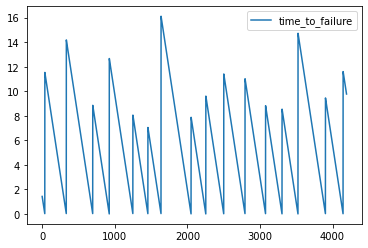

In [ ]:
y_tr.plot()
plt.show()

Fold 0:


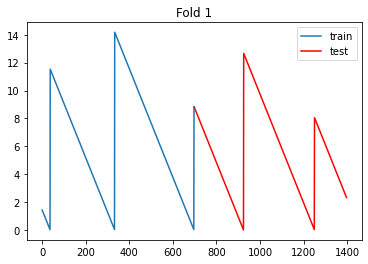

----------------------------------
Fold 1:


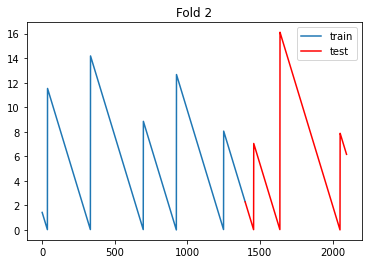

----------------------------------
Fold 2:


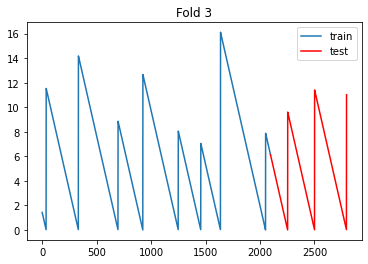

----------------------------------
Fold 3:


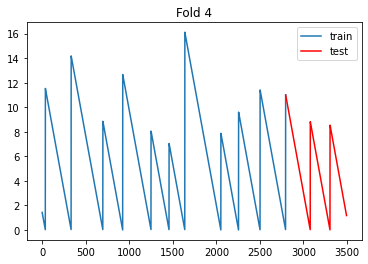

----------------------------------
Fold 4:


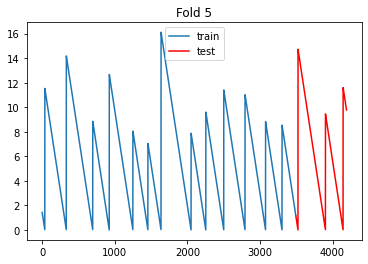

----------------------------------


In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {i}:")
    X_train_subset = X_train_scaled.iloc[train_index, :]
    y_train_subset = y_tr.iloc[train_index, :]
    X_test_subset = X_train_scaled.iloc[test_index, :]
    y_test_subset = y_tr.iloc[test_index, :]
    
    plt.plot(y_train_subset.index, y_train_subset, label = 'train')
    plt.plot(y_test_subset.index, y_test_subset, label = 'test', color = 'red')
    plt.title(f'Fold {i+1}')
    plt.legend()
    plt.show()
    print('----------------------------------')

Fold 0:
MAE: 2.209129120658907


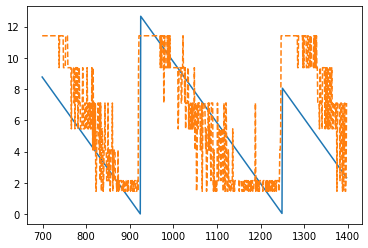

----------------------------------
Fold 1:
MAE: 3.224648318747765


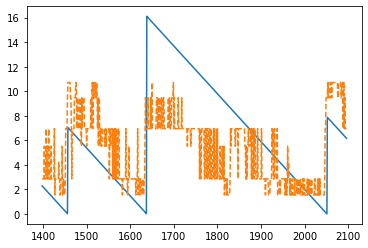

----------------------------------
Fold 2:
MAE: 1.7568566809396375


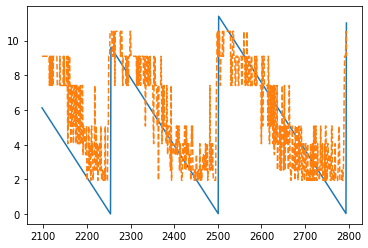

----------------------------------
Fold 3:
MAE: 1.4530321811572335


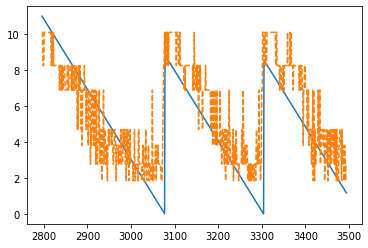

----------------------------------
Fold 4:
MAE: 2.59530999288709


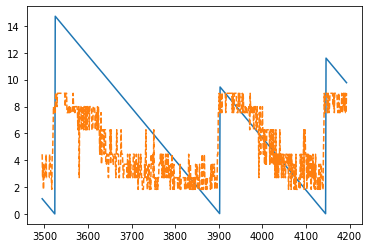

----------------------------------
Overall MAE: 2.247795258878127


In [ ]:
MAE_dectree = []

actual = []
pred_dectree = []

best_params = {'criterion':'absolute_error', 'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 
               'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 5,
               'random_state':111}
dectree_best = DecisionTreeRegressor(**best_params)

for i, (train_index, test_index) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {i}:")
    X_train_subset = X_train_scaled.iloc[train_index, :]
    y_train_subset = y_tr.iloc[train_index, :]
    X_test_subset = X_train_scaled.iloc[test_index, :]
    y_test_subset = y_tr.iloc[test_index, :]

    dectree_best.fit(X_train_subset, y_train_subset)
    y_pred = dectree_best.predict(X_test_subset)
    print(f"MAE: {mean_absolute_error(y_test_subset, y_pred)}")
    MAE_dectree.append(mean_absolute_error(y_test_subset, y_pred))

    actual.extend(y_test_subset['time_to_failure']) 
    pred_dectree.extend(y_pred)
    
    plt.plot(y_test_subset.index, y_test_subset, label = 'actual')
    plt.plot(y_test_subset.index, y_pred, label = 'predicted', linestyle = '--')
    plt.show()
    print('----------------------------------')

print(f'Overall MAE: {np.mean(MAE_dectree)}')

In [ ]:
y_tr_pred_dectree = pd.DataFrame({'Actual': actual,
                          'Prediction': pred_dectree,
                          'Model':'Decision Tree Regressor'})
y_tr_pred_dectree['diff_actual'] = y_tr_pred_dectree ['Actual'].diff()
y_tr_pred_dectree['diff_pred'] = y_tr_pred_dectree ['Prediction'].diff()
time_earthquake_dectree  = y_tr_pred_dectree[y_tr_pred_dectree['diff_actual'] >= 0][['Actual','Prediction','Model']]
time_earthquake_dectree['error'] = time_earthquake_dectree['Actual'] - time_earthquake_dectree['Prediction']
time_earthquake_dectree['time'] = ['Early' if error > 0 else 'Late' for error in time_earthquake_dectree['error']]
print('Worst Case Late:', np.min(time_earthquake_dectree['error']))
print(time_earthquake_dectree['time'].value_counts())

Worst Case Late: -3.6640625
Early    9
Late     4
Name: time, dtype: int64


Waktu Prediksi: 1.104574203491211 s


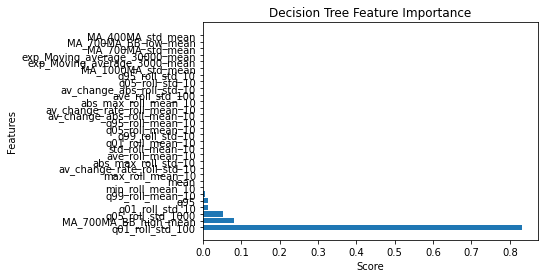

In [ ]:
# Feature Importance
start_time = time.time()
# Fit
dectree_best.fit(X_train_scaled, y_tr)
y_pred_dectree = dectree_best.predict(X_test_scaled)
print(f'Waktu Prediksi: {time.time() - start_time} s')
# get importance
importance = dectree_best.feature_importances_
dectree_importance_df = pd.DataFrame({'Feature':X_train_scaled.columns,
                                      'Importance':importance}).sort_values(by = 'Importance', ascending = False)
# plot feature importance
plt.barh(dectree_importance_df.Feature[:30], dectree_importance_df.Importance[:30])
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

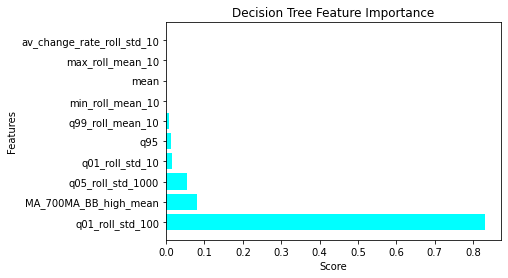

In [ ]:
# plot feature importance
plt.barh(dectree_importance_df.Feature[:10], dectree_importance_df.Importance[:10], color = 'cyan')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

### AdaBoost

In [ ]:
adaboost = AdaBoostRegressor(learning_rate = 0.05)
tscv = TimeSeriesSplit()
grid_adaboost = {'n_estimators' : [100, 300, 500, 700, 900, 1100]}

adaboost_cv = RandomizedSearchCV(adaboost, grid_adaboost, scoring = 'neg_mean_absolute_error', cv = tscv)

In [ ]:
for n in range(5):
  print(f"Iter-{n+1}:")
  adaboost_cv.fit(X_train_scaled, np.array(y_tr))
  print(f'Best Params: {adaboost_cv.best_params_}')
  print(f'Best Score: {adaboost_cv.best_score_}')
  print('-------------------------------------------')

Iter-1:


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: ignored

Fold 0:
MAE: 2.1604195207563732


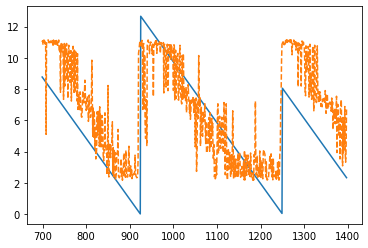

----------------------------------
Fold 1:
MAE: 3.2217492840058175


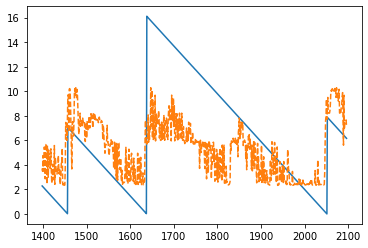

----------------------------------
Fold 2:
MAE: 1.8167502680799408


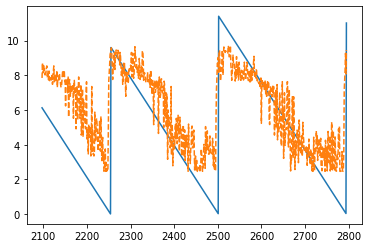

----------------------------------
Fold 3:
MAE: 1.4359869613598273


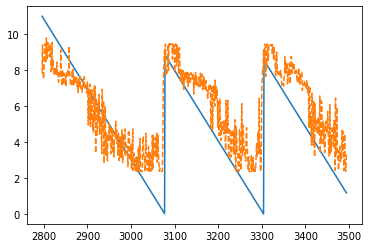

----------------------------------
Fold 4:
MAE: 2.6367398903262766


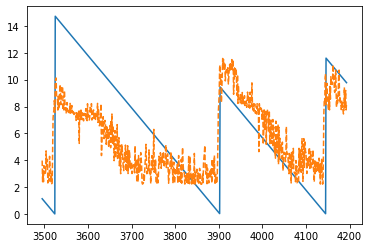

----------------------------------
Rerata MAE: 2.2543291849056475


In [ ]:
best_params = {'n_estimators': 100, 'learning_rate': 0.05, 'random_state':111}
adaboost_best = AdaBoostRegressor(**best_params)
MAE_adaboost = []
pred_adaboost = []

for i, (train_index, test_index) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {i}:")
    X_train_subset = X_train_scaled.iloc[train_index, :]
    y_train_subset = y_tr.iloc[train_index, :]
    X_test_subset = X_train_scaled.iloc[test_index, :]
    y_test_subset = y_tr.iloc[test_index, :]

    adaboost_best.fit(X_train_subset, y_train_subset)
    y_pred = adaboost_best.predict(X_test_subset)
    print(f"MAE: {mean_absolute_error(y_test_subset, y_pred)}")
    MAE_adaboost.append(mean_absolute_error(y_test_subset, y_pred))
 
    pred_adaboost.extend(y_pred)
    
    plt.plot(y_test_subset.index, y_test_subset, label = 'actual')
    plt.plot(y_test_subset.index, y_pred, label = 'predicted', linestyle = '--')
    plt.show()
    print('----------------------------------')

print('Rerata MAE:', np.mean(MAE_adaboost))

In [ ]:
y_tr_pred_adaboost = pd.DataFrame({'Actual': actual,
                          'Prediction': pred_adaboost,
                          'Model':'Adaboost Regressor'})
y_tr_pred_adaboost ['diff_actual'] = y_tr_pred_adaboost['Actual'].diff()
y_tr_pred_adaboost['diff_pred'] = y_tr_pred_adaboost['Prediction'].diff()
time_earthquake_adaboost  = y_tr_pred_adaboost[y_tr_pred_adaboost['diff_actual'] >= 0][['Actual','Prediction','Model']]
time_earthquake_adaboost['error'] = time_earthquake_adaboost['Actual'] - time_earthquake_adaboost['Prediction']
time_earthquake_adaboost['time'] = ['Early' if error > 0 else 'Late' for error in time_earthquake_adaboost['error']]
print('Worst Case Late:', np.min(time_earthquake_adaboost['error']))
print(time_earthquake_adaboost['time'].value_counts())

Worst Case Late: -2.878147916973761
Early    8
Late     5
Name: time, dtype: int64


In [ ]:
time_earthquake_adaboost

,Actual,Prediction,Model,error,time
226,12.664062,10.835055,Adaboost Regressor,1.829008,Early
551,8.054688,10.932835,Adaboost Regressor,-2.878148,Late
758,7.046875,9.697542,Adaboost Regressor,-2.650667,Late
939,16.109375,5.695540,Adaboost Regressor,10.413835,Early
1353,7.875000,8.433165,Adaboost Regressor,-0.558165,Late
1556,9.601562,9.418759,Adaboost Regressor,0.182804,Early
1803,11.406250,8.177392,Adaboost Regressor,3.228858,Early
2096,11.015625,9.446510,Adaboost Regressor,1.569115,Early
2379,8.820312,8.402488,Adaboost Regressor,0.417824,Early
2606,8.539062,8.660554,Adaboost Regressor,-0.121491,Late


Waktu Prediksi: 20.163870334625244 s


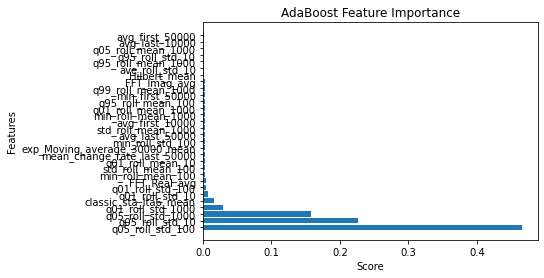

In [ ]:
# Feature Importance
# Fit
start_time = time.time()
adaboost_best.fit(X_train_scaled, y_tr)
y_pred_adaboost = adaboost_best.predict(X_test_scaled)  
print(f'Waktu Prediksi: {time.time() - start_time} s')
# get importance
importance = adaboost_best.feature_importances_
adaboost_importance_df = pd.DataFrame({'Feature':X_train_scaled.columns,
                                      'Importance':importance}).sort_values(by = 'Importance', ascending = False)

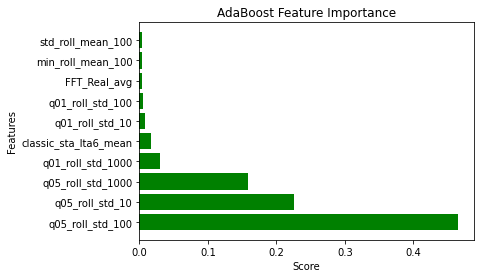

In [ ]:
# plot feature importance
plt.barh(adaboost_importance_df.Feature[:10], adaboost_importance_df.Importance[:10], color = 'green')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('AdaBoost Feature Importance')
plt.show()

### HistGradientBoosting

In [ ]:
hgb = HistGradientBoostingRegressor(loss = 'absolute_error')
tscv = TimeSeriesSplit()
grid_hgb = {"max_iter": [100, 300, 500],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

hgb_cv = RandomizedSearchCV(hgb, grid_hgb, scoring = 'neg_mean_absolute_error', cv = tscv)

In [ ]:
for n in range(5):
  print(f"Iter-{n+1}:")
  hgb_cv.fit(X_train_scaled, y_tr)
  print(f'Best Params: {hgb_cv.best_params_}')
  print(f'Best Score: {hgb_cv.best_score_}')
  print('-------------------------------------------')

Iter-1:
Best Params: {'min_samples_leaf': 10, 'max_leaf_nodes': 20, 'max_iter': 100, 'max_depth': 1}
Best Score: -2.2078239042899
-------------------------------------------
Iter-2:
Best Params: {'min_samples_leaf': 2, 'max_leaf_nodes': 80, 'max_iter': 300, 'max_depth': 1}
Best Score: -2.288581814593505
-------------------------------------------
Iter-3:
Best Params: {'min_samples_leaf': 8, 'max_leaf_nodes': 90, 'max_iter': 100, 'max_depth': 1}
Best Score: -2.2076262152101003
-------------------------------------------
Iter-4:
Best Params: {'min_samples_leaf': 2, 'max_leaf_nodes': 90, 'max_iter': 500, 'max_depth': 1}
Best Score: -2.2939108154798076
-------------------------------------------
Iter-5:
Best Params: {'min_samples_leaf': 10, 'max_leaf_nodes': 70, 'max_iter': 500, 'max_depth': 5}
Best Score: -2.316461446251126
-------------------------------------------


Fold 1:
MAE: 2.2078060446406016


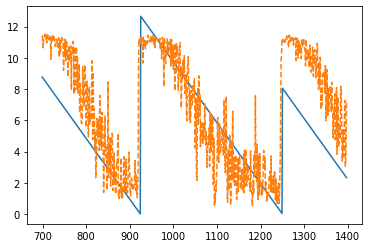

----------------------------------
Fold 2:
MAE: 3.189927329981508


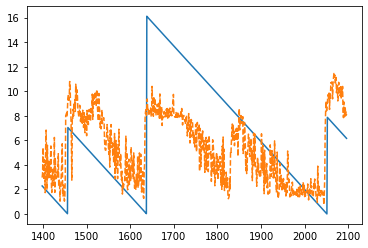

----------------------------------
Fold 3:
MAE: 1.7211302531209256


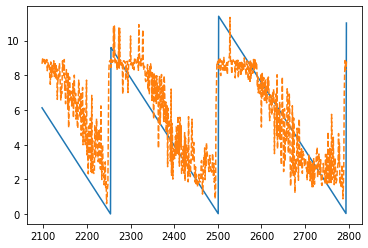

----------------------------------
Fold 4:
MAE: 1.336137168649238


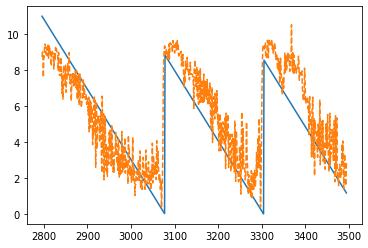

----------------------------------
Fold 5:
MAE: 2.5841187250572277


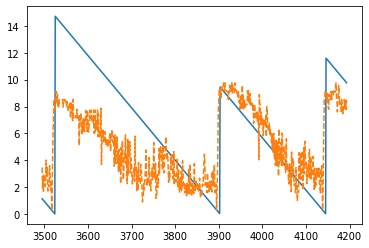

----------------------------------
Mean Overall MAE: 2.2078239042899


In [ ]:
best_params = {'loss':'absolute_error', 'min_samples_leaf': 10, 'max_leaf_nodes': 20, 'max_iter': 100, 'max_depth': 1,
               'random_state':111}
hgb_best = HistGradientBoostingRegressor(**best_params)
MAE_hgb = []
pred_hgb = []

for i, (train_index, test_index) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {i+1}:")
    X_train_subset = X_train_scaled.iloc[train_index, :]
    y_train_subset = y_tr.iloc[train_index, :]
    X_test_subset = X_train_scaled.iloc[test_index, :]
    y_test_subset = y_tr.iloc[test_index, :]

    hgb_best.fit(X_train_subset, y_train_subset)
    y_pred = hgb_best.predict(X_test_subset)
    print(f"MAE: {mean_absolute_error(y_test_subset, y_pred)}")
    MAE_hgb.append(mean_absolute_error(y_test_subset, y_pred))
    pred_hgb.extend(y_pred)

    plt.plot(y_test_subset.index, y_test_subset, label = 'actual')
    plt.plot(y_test_subset.index, y_pred, label = 'predicted', linestyle = '--')
    plt.show()
    print('----------------------------------')
print("Mean Overall MAE:", np.mean(MAE_hgb))

In [ ]:
y_tr_pred_hgb = pd.DataFrame({'Actual': actual,
                          'Prediction': pred_hgb,
                          'Model':'HistGradientBoosting Regressor'})
y_tr_pred_hgb['diff_actual'] = y_tr_pred_hgb['Actual'].diff()
y_tr_pred_hgb['diff_pred'] = y_tr_pred_hgb['Prediction'].diff()
time_earthquake_hgb = y_tr_pred_hgb[y_tr_pred_hgb['diff_actual'] >= 0][['Actual','Prediction','Model']]
time_earthquake_hgb['error'] = time_earthquake_hgb['Actual'] - time_earthquake_hgb['Prediction']
time_earthquake_hgb['time'] = ['Early' if error > 0 else 'Late' for error in time_earthquake_hgb['error']]
print('Worst Case Late:', np.min(time_earthquake_hgb['error']))
print(time_earthquake_hgb['time'].value_counts())

Worst Case Late: -3.1574809286922676
Early    8
Late     5
Name: time, dtype: int64


In [ ]:
# Feature Importance
# Fit
start_time = time.time()
hgb_best.fit(X_train_scaled, y_tr)
y_pred_hgb = hgb_best.predict(X_test_scaled) 
print(f'Waktu Prediksi: {time.time() - start_time} s')

Waktu Prediksi: 1.5629329681396484 s


### LightGBM

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression')

n_estimators=scipy.stats.randint(50,400)
max_depth=scipy.stats.randint(2,10)
lambda_l1=np.arange(0,0.8,0.05)
lambda_l2=np.arange(0,0.8,0.05)
extra_trees=[True,False]
subsample=np.arange(0.3,1.0,0.05)
bagging_freq=scipy.stats.randint(1,100)
colsample_bytree=np.arange(0.3,1.0,0.05)
num_leaves=scipy.stats.randint(10,100)
boosting=['gbdt','dart']
drop_rate=np.arange(0.1,0.8,0.1)
skip_drop=np.arange(0,0.7,0.1)
learning_rate=[0.00001,0.0001,0.001,0.01,0.015,0.02,0.05,0.1,0.15,0.2]
params = {'n_estimators':n_estimators,'max_depth':max_depth, 'subsample':subsample,
          'colsample_bytree':colsample_bytree,
          'learning_rate':learning_rate,
          'num_leaves':num_leaves,
          'boosting':boosting,
          'extra_trees':extra_trees,
          'lambda_l1':lambda_l1,
          'lambda_l2':lambda_l2,
          'bagging_freq':bagging_freq,
          'drop_rate':drop_rate}

lgb_cv = RandomizedSearchCV(model_lgb, params, scoring = 'neg_mean_absolute_error',cv = 3)

In [ ]:
for n in range(5):
  print(f"Iter-{n+1}:")
  lgb_cv.fit(X_train_scaled, y_tr)
  print(f'Best Params: {lgb_cv.best_params_}')
  print(f'Best Score: {lgb_cv.best_score_}')
  print('-------------------------------------------')

Iter-1:
Best Params: {'bagging_freq': 83, 'boosting': 'gbdt', 'colsample_bytree': 0.35, 'drop_rate': 0.2, 'extra_trees': True, 'lambda_l1': 0.65, 'lambda_l2': 0.7000000000000001, 'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 217, 'num_leaves': 95, 'subsample': 0.35}
Best Score: -2.2033782353321114
-------------------------------------------
Iter-2:
Best Params: {'bagging_freq': 89, 'boosting': 'dart', 'colsample_bytree': 0.7999999999999998, 'drop_rate': 0.2, 'extra_trees': True, 'lambda_l1': 0.55, 'lambda_l2': 0.1, 'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 69, 'num_leaves': 76, 'subsample': 0.49999999999999994}
Best Score: -2.2307156137771678
-------------------------------------------
Iter-3:
Best Params: {'bagging_freq': 23, 'boosting': 'gbdt', 'colsample_bytree': 0.49999999999999994, 'drop_rate': 0.4, 'extra_trees': True, 'lambda_l1': 0.5, 'lambda_l2': 0.35000000000000003, 'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 135, 'num_leaves': 13, 'subsample

objective='regression',bagging_fraction = 0.8,
                              bagging_freq = 5,
                              feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf = 9,
                             min_sum_hessian_in_leaf = 11

In [ ]:
best_params = {'objective':'regression', 'bagging_freq': 69, 'boosting': 'dart', 'colsample_bytree': 0.7499999999999999, 'drop_rate': 0.1, 'extra_trees': True, 'lambda_l1': 0.4, 'lambda_l2': 0.0, 'learning_rate': 0.05, 
                'max_depth': 6, 'n_estimators': 272, 'num_leaves': 59, 'subsample': 0.8999999999999999,
               'random_state':111}
lgb_best = lgb.LGBMRegressor(**best_params)

sfs_lgb = SFS(lgb_best,
                  k_features = 20,
                  forward=True, 
                  floating=False, 
                  verbose=2,
                  scoring='neg_mean_absolute_error',
                  cv = tscv)
sfs_lgb.fit(X_train_scaled, y_tr, custom_feature_names=X_train_scaled.columns)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=LGBMRegressor(bagging_freq=69,
                                                  boosting='dart',
                                                  colsample_bytree=0.7499999999999999,
                                                  drop_rate=0.1,
                                                  extra_trees=True,
                                                  lambda_l1=0.4, lambda_l2=0.0,
                                                  learning_rate=0.05,
                                                  max_depth=6, n_estimators=272,
                                                  num_leaves=59,
                                                  objective='regression',
                                                  random_state=111,
                                                  subsample=0.8999999999999999),
                         

Fold 1:
MAE: 1.866746130992782


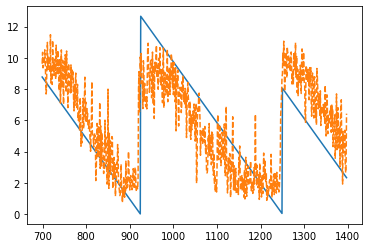

----------------------------------
Fold 2:
MAE: 3.2793555288367386


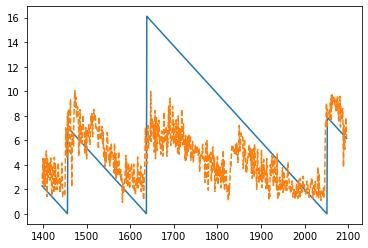

----------------------------------
Fold 3:
MAE: 1.6216604276102202


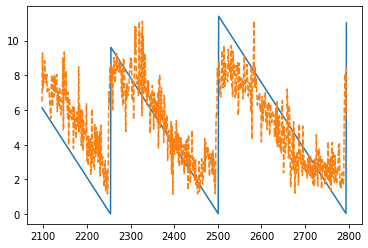

----------------------------------
Fold 4:
MAE: 1.224390877413012


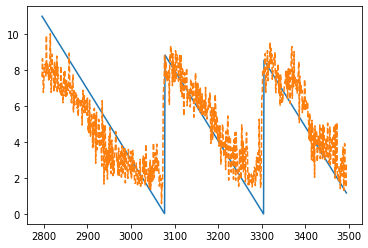

----------------------------------
Fold 5:
MAE: 2.834225280399051


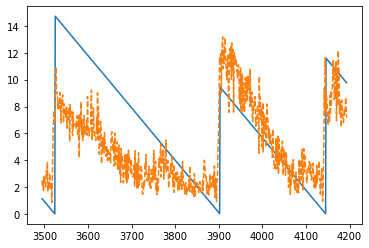

----------------------------------
Overall MAE: 2.165275649050361


In [ ]:
MAE_LGB = []
pred_lgb = []

best_params = {'objective':'regression', 'bagging_freq': 69, 'boosting': 'dart', 'colsample_bytree': 0.7499999999999999, 'drop_rate': 0.1, 
               'extra_trees': True, 'lambda_l1': 0.4, 'lambda_l2': 0.0, 'learning_rate': 0.05, 
                'max_depth': 6, 'n_estimators': 272, 'num_leaves': 59, 'subsample': 0.8999999999999999,
               'random_state':111}
lgb_best = lgb.LGBMRegressor(**best_params)

for i, (train_index, test_index) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {i+1}:")
    X_train_subset = X_train_scaled.iloc[train_index, :]
    y_train_subset = y_tr.iloc[train_index, :]
    X_test_subset = X_train_scaled.iloc[test_index, :]
    y_test_subset = y_tr.iloc[test_index, :]

    lgb_best.fit(X_train_subset, y_train_subset)
    y_pred = lgb_best.predict(X_test_subset)
    pred_lgb.extend(y_pred)
    print(f"MAE: {mean_absolute_error(y_test_subset, y_pred)}")
    MAE_LGB.append(mean_absolute_error(y_test_subset, y_pred))
    plt.plot(y_test_subset.index, y_test_subset, label = 'actual')
    plt.plot(y_test_subset.index, y_pred, label = 'predicted', linestyle = '--')
    plt.show()
    print('----------------------------------')
print(f"Overall MAE: {np.mean(MAE_LGB)}")

In [ ]:
y_tr_pred_lgb = pd.DataFrame({'Actual': actual,
                          'Prediction': pred_lgb,
                          'Model':'Light GBM Regressor'})
y_tr_pred_lgb['diff_actual'] = y_tr_pred_lgb['Actual'].diff()
y_tr_pred_lgb['diff_pred'] = y_tr_pred_lgb['Prediction'].diff()
time_earthquake_lgb = y_tr_pred_lgb[y_tr_pred_lgb['diff_actual'] >= 0][['Actual','Prediction','Model']]
time_earthquake_lgb['error'] = time_earthquake_lgb['Actual'] - time_earthquake_lgb['Prediction']
time_earthquake_lgb['time'] = ['Early' if error > 0 else 'Late' for error in time_earthquake_lgb['error']]
print('Worst Case Late:', np.min(time_earthquake_lgb['error']))
print(time_earthquake_lgb['time'].value_counts())

Worst Case Late: -1.8311569024290506
Early    9
Late     4
Name: time, dtype: int64


Waktu prediksi: 7.5901079177856445 s


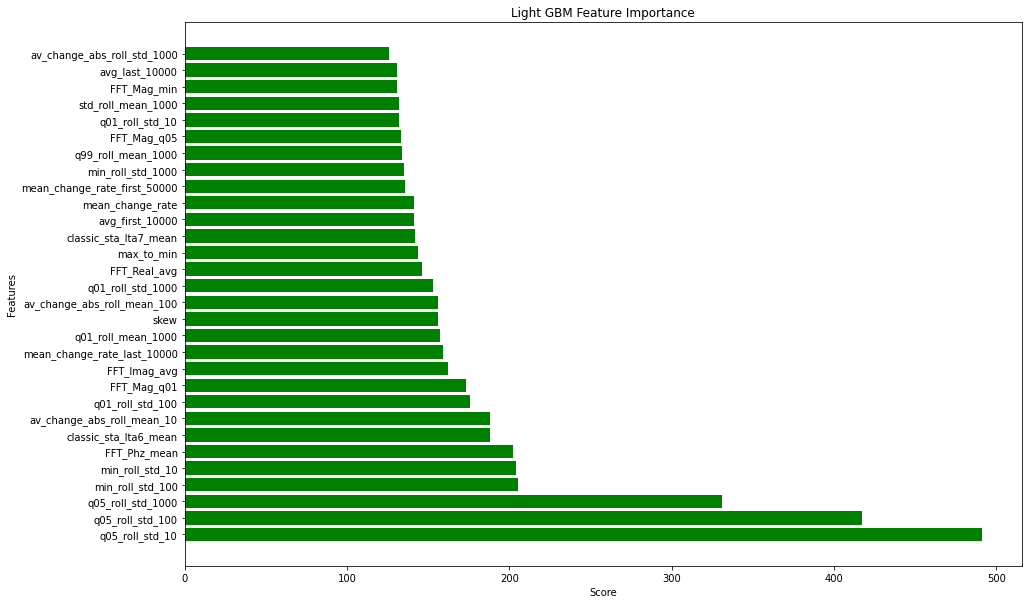

In [ ]:
# Feature Importance
# Fit
start_time = time.time()
lgb_best.fit(X_train_scaled, y_tr)
y_pred_lgb = lgb_best.predict(X_test_scaled)
print(f'Waktu prediksi: {time.time() - start_time} s')
# get importance
importance = lgb_best.feature_importances_
lgb_importance_df = pd.DataFrame({'Feature':X_train_scaled.columns,
                                      'Importance':importance}).sort_values(by = 'Importance', ascending = False)
# plot feature importance
plt.figure(figsize = (15,10))
plt.barh(lgb_importance_df.Feature[:30], lgb_importance_df.Importance[:30], color = 'green')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Light GBM Feature Importance')
plt.show()

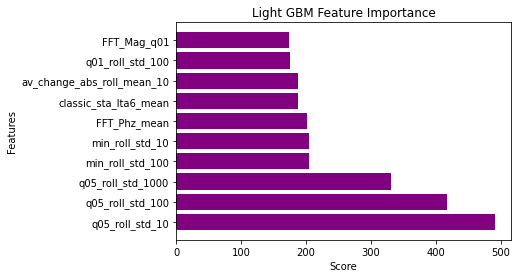

In [ ]:
# plot feature importance
plt.barh(lgb_importance_df.Feature[:10], lgb_importance_df.Importance[:10], color = 'purple')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Light GBM Feature Importance')
plt.show()

### XGBoost

In [ ]:
model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror')

grid_XGB = {'learning_rate' : [0.01, 0.015, 0.025, 0.05, 0.1],
            'n_estimators' : [100, 300, 500, 700, 900, 1100],
            'gamma' : [0.05, 0.075, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
            'max_depth' : [3, 5, 7, 9, 12],
            'min_child_weight' : [1,3,5,7],
            'lambda' : [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 1],
            'subsample' : [0.6, 0.7, 0.8, 0.9, 1],
            'colsample_bytree' : [0.6,0.7,0.8,0.9,1],
            'alpha' : [0, 0.1, 0.5, 1]}

tscv = TimeSeriesSplit()
xgb_cv = RandomizedSearchCV(model_xgb, grid_XGB, scoring = 'neg_mean_absolute_error',cv = tscv)

In [ ]:
for n in range(10):
  print(f"Iter-{n+1}:")
  xgb_cv.fit(X_train_scaled, y_tr)
  print(f'Best Params: {xgb_cv.best_params_}')
  print(f'Best Score: {xgb_cv.best_score_}')
  print('-------------------------------------------')

Iter-1:


KeyboardInterrupt: ignored

In [ ]:
best_params = {'objective':'reg:squarederror',
               'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 
                'learning_rate': 0.015, 'lambda': 0.07, 'gamma': 0.075, 'colsample_bytree': 0.8, 'alpha': 1}
xgb_best = xgb.XGBRegressor(**best_params)  
sfs_xgb = SFS(xgb_best,
                  k_features = 10,
                  forward=True, 
                  floating=False, 
                  verbose=2,
                  scoring='neg_mean_absolute_error',
                  cv = tscv)
sfs_xgb.fit(X_train_scaled, y_tr, custom_feature_names=X_train_scaled.columns)

In [ ]:
sfs_xgb.k_feature_names_

In [ ]:
X_train_scaled_xgb = X_train_scaled[['max_first_50000',
 'classic_sta_lta1_mean',
 'q95_roll_mean_10',
 'q05_roll_std_100',
 'q05_roll_std_1000']]
X_test_scaled_xgb = X_test_scaled[['max_first_50000',
 'classic_sta_lta1_mean',
 'q95_roll_mean_10',
 'q05_roll_std_100',
 'q05_roll_std_1000']]

Fold 1:
MAE: 1.7683951488039182


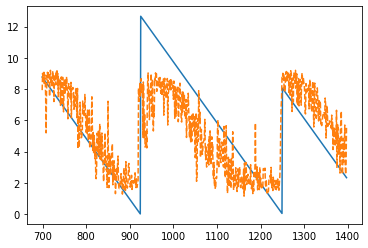

----------------------------------
Fold 2:
MAE: 3.2557724564201673


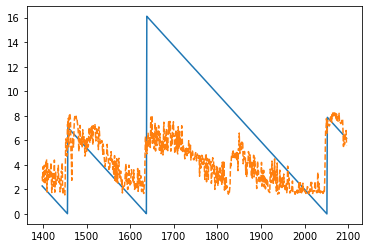

----------------------------------
Fold 3:
MAE: 1.5965982179273353


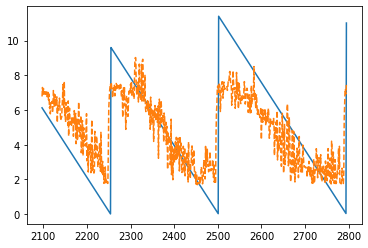

----------------------------------
Fold 4:
MAE: 1.2403164602315135


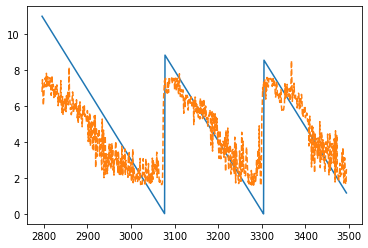

----------------------------------
Fold 5:
MAE: 2.8525257211215846


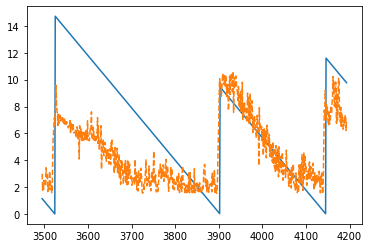

----------------------------------
Average MAE: 2.1427216009009036


In [ ]:
MAE_xgb = []
best_params = {'objective':'reg:squarederror',
               'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 
                'learning_rate': 0.015, 'lambda': 0.07, 'gamma': 0.075, 'colsample_bytree': 0.8, 'alpha': 1,
               'random_state': 111}
xgb_best = xgb.XGBRegressor(**best_params)  
pred_xgb = []
tscv = TimeSeriesSplit()
for i, (train_index, test_index) in enumerate(tscv.split(X_train_scaled)):
    print(f"Fold {i+1}:")
    X_train_subset = X_train_scaled.iloc[train_index, :]
    y_train_subset = y_tr.iloc[train_index, :]
    X_test_subset = X_train_scaled.iloc[test_index, :]
    y_test_subset = y_tr.iloc[test_index, :]

    xgb_best.fit(X_train_subset, y_train_subset)
    y_pred = xgb_best.predict(X_test_subset)
    pred_xgb.extend(y_pred)
    print(f"MAE: {mean_absolute_error(y_test_subset, y_pred)}")
    MAE_xgb.append(mean_absolute_error(y_test_subset, y_pred))
    plt.plot(y_test_subset.index, y_test_subset, label = 'actual')
    plt.plot(y_test_subset.index, y_pred, label = 'predicted', linestyle = '--')
    plt.show()
    print('----------------------------------')
print('Average MAE:', np.mean(MAE_xgb))

In [ ]:
pred_df = pd.DataFrame()
pred_df['Actual'] = y_tr.iloc[699:, 0]
pred_df['DT'] = pred_dectree
pred_df['AdaBoost'] = pred_adaboost
pred_df['XGB'] = pred_xgb
pred_df['LGBM'] = pred_lgb
pred_df['HGB'] = pred_hgb

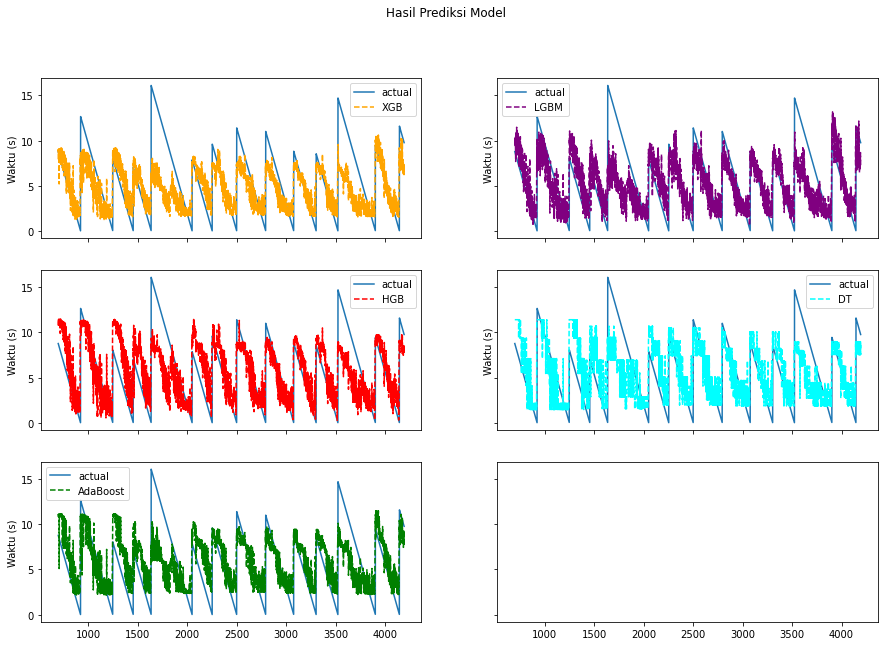

In [ ]:
fig, axes = plt.subplots(3,2, figsize = (15,10), sharey = True, sharex = True)
fig.suptitle('Hasil Prediksi Model')
axes[0,0].plot(pred_df.index, pred_df['Actual'], label = 'actual')
axes[0,0].plot(pred_df.index, pred_df['XGB'], linestyle = '--', color = 'orange', label = 'XGB')
axes[0,0].set_ylabel('Waktu (s)')
axes[0,0].legend()

axes[0,1].plot(pred_df.index, pred_df['Actual'], label = 'actual')
axes[0,1].plot(pred_df.index, pred_df['LGBM'], linestyle = '--', color = 'purple', label = 'LGBM')
axes[0,1].set_ylabel('Waktu (s)')
axes[0,1].legend()

axes[1,0].plot(pred_df.index, pred_df['Actual'], label = 'actual')
axes[1,0].plot(pred_df.index, pred_df['HGB'], linestyle = '--', color = 'red', label = 'HGB')
axes[1,0].set_ylabel('Waktu (s)')
axes[1,0].legend()

axes[1,1].plot(pred_df.index, pred_df['Actual'], label = 'actual')
axes[1,1].plot(pred_df.index, pred_df['DT'], linestyle = '--', color = 'cyan', label = 'DT')
axes[1,1].set_ylabel('Waktu (s)')
axes[1,1].legend()

axes[2,0].plot(pred_df.index, pred_df['Actual'], label = 'actual')
axes[2,0].plot(pred_df.index, pred_df['AdaBoost'], linestyle = '--', color = 'green', label = 'AdaBoost')
axes[2,0].set_ylabel('Waktu (s)')
axes[2,0].legend()
plt.show()

In [ ]:
y_tr_pred_xgb = pd.DataFrame({'Actual': actual,
                          'Prediction': pred_xgb,
                          'Model':'XGBoost Regressor'})
y_tr_pred_xgb['diff_actual'] = y_tr_pred_xgb['Actual'].diff()
y_tr_pred_xgb['diff_pred'] = y_tr_pred_xgb['Prediction'].diff()
time_earthquake_xgb = y_tr_pred_xgb[y_tr_pred_xgb['diff_actual'] >= 0][['Actual','Prediction','Model']]
time_earthquake_xgb['error'] = time_earthquake_xgb['Actual'] - time_earthquake_xgb['Prediction']
time_earthquake_xgb['time'] = ['Early' if error > 0 else 'Late' for error in time_earthquake_xgb['error']]
print('Worst Case Late:', np.min(time_earthquake_xgb['error']))
print(time_earthquake_xgb['time'].value_counts())

Worst Case Late: -0.6944332122802734
Early    10
Late      3
Name: time, dtype: int64


Waktu prediksi: 2.7898035049438477 s


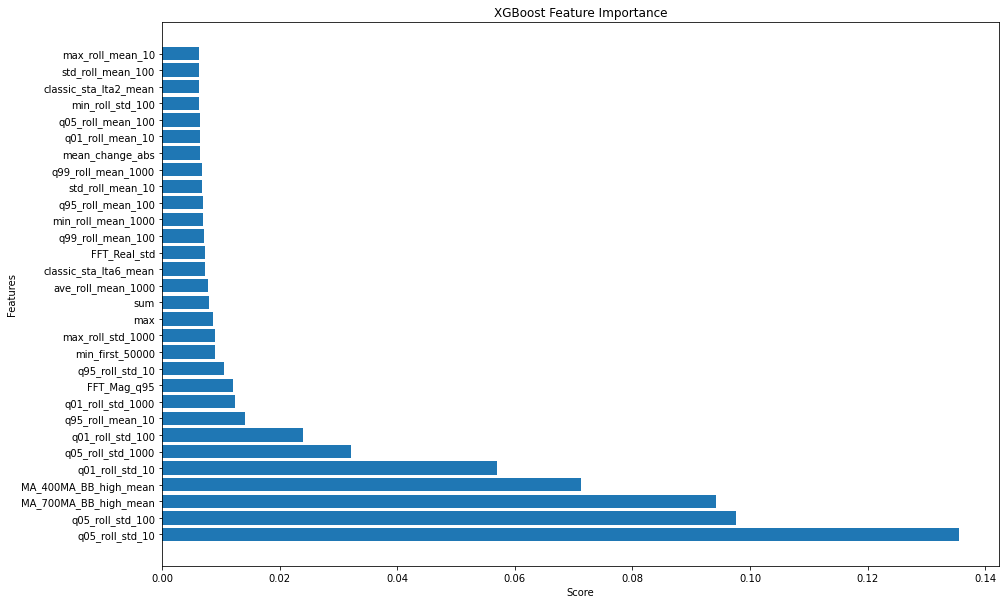

In [ ]:
# Feature Importance
# Fit
start_time = time.time()
xgb_best.fit(X_train_scaled, y_tr)
y_pred_xgb = xgb_best.predict(X_test_scaled)
print(f'Waktu prediksi: {time.time() - start_time} s')
# get importance
importance = xgb_best.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature':X_train_scaled.columns,
                                      'Importance':importance}).sort_values(by = 'Importance', ascending = False)
# plot feature importance
plt.figure(figsize = (15,10))
plt.barh(xgb_importance_df.Feature[:30], xgb_importance_df.Importance[:30])
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

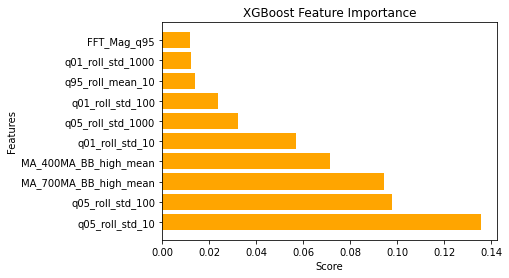

In [ ]:
# plot feature importance
plt.barh(xgb_importance_df.Feature[:10], xgb_importance_df.Importance[:10], color = 'orange')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

## Submission

### Summary MAE

In [ ]:
fold_1 = [MAE_dectree[0], MAE_adaboost[0], MAE_hgb[0], MAE_LGB[0], MAE_xgb[0]]
fold_2 = [MAE_dectree[1], MAE_adaboost[1], MAE_hgb[1], MAE_LGB[1], MAE_xgb[1]]
fold_3 = [MAE_dectree[2], MAE_adaboost[2], MAE_hgb[2], MAE_LGB[2], MAE_xgb[2]]
fold_4 = [MAE_dectree[3], MAE_adaboost[3], MAE_hgb[3], MAE_LGB[3], MAE_xgb[3]]
fold_5 = [MAE_dectree[4], MAE_adaboost[4], MAE_hgb[4], MAE_LGB[4], MAE_xgb[4]]

time_exec = [1.399343490600586, 15.232008457183838, 0.3676931858062744,
             5.682025909423828, 3.0739595890045166]
model = ['Decision Tree Regressor','Adaboost Regressor', 'HistGradientBoosting Regressor',
         'Light GBM Regressor', 'XGBoost Regressor']
dict_summary_mae = {'Model':model,
                    'Total Time Execution (s)': time_exec,
                    'MAE Fold-1':fold_1,
                    'MAE Fold-2':fold_2,
                    'MAE Fold-3':fold_3,
                    'MAE Fold-4':fold_4,
                    'MAE Fold-5':fold_5}
summary_mae = pd.DataFrame(dict_summary_mae)
summary_mae['Overall MAE'] = summary_mae['MAE Fold-1'] + summary_mae['MAE Fold-2'] + summary_mae['MAE Fold-3'] + summary_mae['MAE Fold-4'] +summary_mae['MAE Fold-5']
summary_mae['Overall MAE'] = summary_mae['Overall MAE']/len(summary_mae)
summary_mae.sort_values(by = ['Overall MAE']).reset_index(drop = True)

,Model,Total Time Execution (s),MAE Fold-1,MAE Fold-2,MAE Fold-3,MAE Fold-4,MAE Fold-5,Overall MAE
0,XGBoost Regressor,3.073960,1.759038,3.266144,1.595388,1.242472,2.849254,2.142459
1,Light GBM Regressor,5.682026,1.860878,3.278354,1.614117,1.234890,2.857514,2.169151
2,HistGradientBoosting Regressor,0.367693,2.207806,3.189927,1.721130,1.336137,2.584119,2.207824
3,Decision Tree Regressor,1.399343,2.209129,3.224648,1.756857,1.453032,2.595310,2.247795
4,Adaboost Regressor,15.232008,2.160420,3.221749,1.816750,1.435987,2.636740,2.254329


### Summary Early Detection

In [ ]:
time_earthquake_dectree['Prediction'].values

array([11.4140625 , 11.4140625 , 10.7109375 ,  6.953125  ,  9.46875   ,
       10.53515625,  9.09765625,  9.09765625,  8.2421875 ,  8.2421875 ,
        7.54492188,  8.984375  ,  8.984375  ])

In [ ]:
# Mean of all prediction
pred_mean = [time_earthquake_dectree['Prediction'].values[i] + time_earthquake_adaboost['Prediction'].values[i] + 
                             time_earthquake_hgb['Prediction'].values[i] + time_earthquake_lgb['Prediction'].values[i] +
                             time_earthquake_xgb['Prediction'].values[i] for i in range(13)]
pred_mean = [1/5*pred for pred in pred_mean]
model = ['Average of 5 models' for i in range(len(pred_mean))]
time_diff_avg = np.array(time_earthquake_dectree['Actual']) - np.array(pred_mean)
time_condition = ['Early' if time > 0 else 'Late' for time in time_diff_avg]

time_earthquake_avg = pd.DataFrame({'Actual': time_earthquake_dectree['Actual'],
                                    'Prediction': pred_mean,
                                    'Model': model, 
                                    'error': time_diff_avg,
                                    'time': time_condition})
time_earthquake_avg

,Actual,Prediction,Model,error,time
226,12.664062,10.188327,Average of 5 models,2.475735,Early
551,8.054688,10.476877,Average of 5 models,-2.422189,Late
758,7.046875,8.859265,Average of 5 models,-1.812390,Late
939,16.109375,5.994236,Average of 5 models,10.115139,Early
1353,7.875000,8.542254,Average of 5 models,-0.667254,Late
1556,9.601562,8.852428,Average of 5 models,0.749134,Early
1803,11.406250,8.021942,Average of 5 models,3.384308,Early
2096,11.015625,8.800152,Average of 5 models,2.215473,Early
2379,8.820312,8.209512,Average of 5 models,0.610801,Early
2606,8.539062,8.235589,Average of 5 models,0.303474,Early


In [ ]:
time_earthquake = pd.concat([time_earthquake_dectree, time_earthquake_adaboost,
                             time_earthquake_hgb, time_earthquake_lgb,
                             time_earthquake_xgb, time_earthquake_avg], axis = 0, ignore_index = True)
time_earthquake = time_earthquake.rename(columns = {'error':'time_diff'})
time_earthquake.head(26)

,Actual,Prediction,Model,time_diff,time
0,12.664062,11.414062,Decision Tree Regressor,1.250000,Early
1,8.054688,11.414062,Decision Tree Regressor,-3.359375,Late
2,7.046875,10.710938,Decision Tree Regressor,-3.664062,Late
3,16.109375,6.953125,Decision Tree Regressor,9.156250,Early
4,7.875000,9.468750,Decision Tree Regressor,-1.593750,Late
5,9.601562,10.535156,Decision Tree Regressor,-0.933594,Late
6,11.406250,9.097656,Decision Tree Regressor,2.308594,Early
7,11.015625,9.097656,Decision Tree Regressor,1.917969,Early
8,8.820312,8.242188,Decision Tree Regressor,0.578125,Early
9,8.539062,8.242188,Decision Tree Regressor,0.296875,Early


In [ ]:
# Frekuensi Waktu
data_frekuensi = time_earthquake.groupby(['Model', 'time'])['time_diff'].count().to_frame()
data_frekuensi['Peluang Lebih Cepat'] = data_frekuensi['time_diff']/13
data_frekuensi

time_diff  Peluang Lebih Cepat
Model                          time                                 
Adaboost Regressor             Early          8             0.615385
                               Late           5             0.384615
Average of 5 models            Early          9             0.692308
                               Late           4             0.307692
Decision Tree Regressor        Early          9             0.692308
                               Late           4             0.307692
HistGradientBoosting Regressor Early          8             0.615385
                               Late           5             0.384615
Light GBM Regressor            Early          9             0.692308
                               Late           4             0.307692
XGBoost Regressor              Early         10             0.769231
                               Late           3             0.230769

In [ ]:
# Rerata Waktu Prediksi Gempa
time_earthquake.groupby(['Model', 'time']).agg({'time_diff':'mean'})

time_diff
Model                          time            
Adaboost Regressor             Early   3.253970
                               Late   -1.568844
Average of 5 models            Early   3.267143
                               Late   -1.388712
Decision Tree Regressor        Early   2.863064
                               Late   -2.387695
HistGradientBoosting Regressor Early   3.182098
                               Late   -1.553345
Light GBM Regressor            Early   3.569728
                               Late   -1.143274
XGBoost Regressor              Early   4.135342
                               Late   -0.585029

In [ ]:
# Minimum Waktu Prediksi Gempa
time_earthquake.groupby(['Model', 'time']).agg({'time_diff':'min'})

time_diff
Model                          time            
Adaboost Regressor             Early   0.182804
                               Late   -2.878148
Average of 5 models            Early   0.303474
                               Late   -2.422189
Decision Tree Regressor        Early   0.296875
                               Late   -3.664062
HistGradientBoosting Regressor Early   0.339152
                               Late   -3.157481
Light GBM Regressor            Early   0.633416
                               Late   -1.831157
XGBoost Regressor              Early   0.706702
                               Late   -0.990983

### Submission

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission

,seg_id,time_to_failure
0,seg_00030f,0
1,seg_0012b5,0
2,seg_00184e,0
3,seg_003339,0
4,seg_0042cc,0
...,...,...
2619,seg_ff4236,0
2620,seg_ff7478,0
2621,seg_ff79d9,0
2622,seg_ffbd6a,0


In [ ]:
submission['time_to_failure'] = y_pred_xgb

In [ ]:
submission

,seg_id,time_to_failure
0,seg_00030f,2.788256
1,seg_0012b5,4.578105
2,seg_00184e,4.142334
3,seg_003339,6.519368
4,seg_0042cc,5.611971
...,...,...
2619,seg_ff4236,3.934400
2620,seg_ff7478,5.567530
2621,seg_ff79d9,3.032867
2622,seg_ffbd6a,1.724455


In [ ]:
X_train_scaled.shape

(4194, 164)

In [ ]:
submission.to_csv('submission_xgb_full.csv', index = False)